# Welcome to Bioinformatics Algorithms!

Genome replication is one of the most important tasks carried out in the cell. Before a cell can divide, it must first replicate its genome so that each of the two daughter cells inherits its own copy. In 1953, James Watson and Francis Crick completed their landmark paper on the DNA double helix with a now famous phrase:

    It has not escaped our notice that the specific pairing we have postulated immediately suggests a possible copying mechanism for the genetic material.

They conjectured that the two strands of the parent DNA molecule unwind during replication, and then each parent strand acts as a template for the synthesis of a new strand. As a result, the replication process begins with a pair of complementary strands of DNA and ends with two pairs of complementary strands, as shown below.

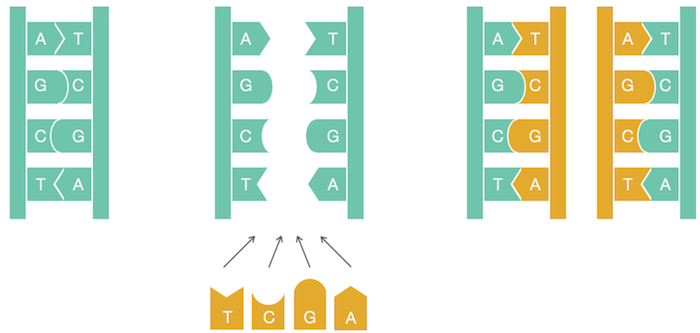

In [10]:
from IPython.display import Image
Image(filename='semiconservative_replication.png')


###  Figure: A naive view of replication. Nucleotides adenine (A) and thymine (T) are complements of each other, as are cytosine (C) and guanine (G). Complementary nucleotides bind to each other in DNA.

Although this figure successfully models DNA replication on a simple level, the details of replication turned out to be much more intricate than Watson and Crick imagined; as we will see, an astounding amount of molecular logistics is required to ensure DNA replication.

 At first glance, a computer scientist might not imagine that these details have any computational relevance. To mimic the 
 process in the above figure algorithmically, we only need to take a string representing the genome and return a copy of it! Yet if we take the time to review the underlying biological process, we will be rewarded with new algorithmic insights into analyzing replication. Replication begins in a genomic region called the replication origin (denoted ori) and is carried out by molecular copy machines called DNA polymerases.

Locating ori presents an important task not only for understanding how cells replicate but also for various biomedical problems. For example, some gene therapy methods use genetically engineered mini-genomes, which are called viral vectors because they are able to penetrate cell walls (just like real viruses). Viral vectors carrying artificial genes have been used in agriculture, such as to engineer frost-resistant tomatoes and pesticide-resistant corn. In 1990, gene therapy was first successfully performed on humans when it saved the life of a four-year-old girl suffering from Severe Combined Immunodeficiency Disorder; the girl had been so vulnerable to infections that she was forced to live in a sterile environment.

The idea of gene therapy is to intentionally infect a patient who lacks a crucial gene with a viral vector containing an artificial gene that encodes a therapeutic protein. Once inside the cell, the vector replicates and eventually produces many copies of the therapeutic protein, which in turn treats the patient’s disease. To ensure that the vector actually replicates inside the cell, biologists must know where ori is in the vector’s genome and ensure that the genetic manipulations that they perform do not affect it.

In the following problem, we assume that a genome has a single ori and is represented as a DNA string, or a string of nucleotides from the four-letter alphabet {A, C, G, T}.

## Finding Origin of Replication Problem:
     Input: A DNA string Genome.
     Output: The location of ori in Genome.

STOP and Think: Does the Finding Origin of Replication Problem represent a clearly stated computational problem?



Although the Finding ori Problem asks a legitimate biological question, it does not present a well-defined computational problem. Indeed, biologists would immediately plan an experiment to locate ori: for example, they might delete various short segments from the genome in an effort to find a segment whose deletion stops replication. Computer scientists, on the other hand, would shake their heads and demand more information before they can even start thinking about the problem.

Why should biologists care what computer scientists think? Computational methods are now the only realistic way to answer many questions in modern biology. First, these methods are much faster than experimental approaches; second, the results of many experiments cannot be interpreted without computational analysis. In particular, existing experimental approaches to ori prediction are rather time consuming. As a result, ori has only been experimentally located in a handful of species. Thus, we would like to design a computational approach to find ori so that biologists are free to spend their time and money on other tasks.


# DnaA boxes 

In the rest of this chapter, we will focus on the relatively easy case of finding ori in bacterial genomes, most of which consist of a single circular chromosome. Research has shown that the region of the bacterial genome encoding ori is typically a few hundred nucleotides long. Our plan is to begin with a bacterium in which ori is known, and then determine what makes this genomic region special in order to design a computational approach for finding ori in other bacteria. Our example is Vibrio cholerae, the pathogenic bacterium that causes cholera; here is the nucleotide sequence appearing in the ori of Vibrio cholerae:

atcaatgatcaacgtaagcttctaagcatgatcaaggtgctcacacagtttatccacaac
ctgagtggatgacatcaagataggtcgttgtatctccttcctctcgtactctcatgacca
cggaaagatgatcaagagaggatgatttcttggccatatcgcaatgaatacttgtgactt
gtgcttccaattgacatcttcagcgccatattgcgctggccaaggtgacggagcgggatt
acgaaagcatgatcatggctgttgttctgtttatcttgttttgactgagacttgttagga
tagacggtttttcatcactgactagccaaagccttactctgcctgacatcgaccgtaaat
tgataatgaatttacatgcttccgcgacgatttacctcttgatcatcgatccgattgaag
atcttcaattgttaattctcttgcctcgactcatagccatgatgagctcttgatcatgtt
tccttaaccctctattttttacggaagaatgatcaagctgctgctcttgatcatcgtttc

# 1.2 Hidden Messages in the Replication Origin

How does the bacterial cell know to begin replication exactly in this short region within the much larger Vibrio cholerae chromosome, which consists of 1,108,250 nucleotides? There must be some “hidden message” in the ori region ordering the cell to begin replication here. Indeed, we know that the initiation of replication is mediated by DnaA, a protein that binds to a short segment within the ori known as a DnaA box. You can think of the DnaA box as a message within the DNA sequence telling the DnaA protein: “bind here!” The question is how to find this hidden message without knowing what it looks like in advance—can you find it? In other words, can you find something that stands out in ori? This discussion motivates the following problem.

Hidden Message Problem: Find a “hidden message” in the replication origin.
     Input: A string Text (representing the replication origin of a genome).
     Output: A hidden message in Text.

# Definition of chromosome; plural noun: chromosomes

A thread-like structure of nucleic acids and protein found in the nucleus of most living cells, carrying genetic information in the form of genes.

# Hidden messages in "The Gold-Bug"

Although the Hidden Message Problem poses a legitimate intuitive question, it again makes absolutely no sense to a computer scientist because the notion of a “hidden message” is not precisely defined. The ori region of Vibrio cholerae is currently just as puzzling as the parchment discovered by William Legrand in Edgar Allan Poe's story "The Gold-Bug". Written on the parchment was

53‡‡†305))6·;4826)4‡.)4‡);806·;48†8^60))85;161;:‡·8
†83(88)5·†;46(;88·96·?;8)·‡(;485);5·†2:·‡(;4956·2(5
·—4)8^8·;4069285);)6†8)4‡‡;1(‡9;48081;8:8‡1;48†85;4
)485†528806·81(‡9;48;(88;4(‡?34;48)4‡;1‡(;:188;‡?;



Upon seeing the parchment, the narrator remarks, "Were all the jewels of Golconda awaiting me upon my solution of this enigma, I am quite sure that I should be unable to earn them." Legrand retorts, "It may well be doubted whether human ingenuity can construct an enigma of the kind which human ingenuity may not, by proper application, resolve." He reasons that the three consecutive symbols ;48 appear with surprising frequency on the parchment.

53‡‡†305))6·;4826)4‡.)4‡);806·;48†8^60))85;161;:‡·8
†83(88)5·†;46(;88·96·?;8)·‡(;485);5·†2:·‡(;4956·2(5
·—4)8^8·;4069285);)6†8)4‡‡;1(‡9;48081;8:8‡1;48†85;4
)485†528806·81(‡9;48;(88;4(‡?34;48)4‡;1‡(;:188;‡?; 


Legrand had already deduced that the pirates spoke English; he therefore assumed that the high frequency of ;48 implied that it encodes the most frequent English word, THE. Substituting ; for T, 4 for H, and 8 for E, Legrand had a slightly easier text to decipher (shown below), which would eventually lead him to the buried treasure. Can you decode this message too?

53‡‡†305))6·THE26)H‡.)H‡)TE06·THE†E^60))E5T161T:‡·E
†E3(EE)5·†TH6(TEE·96·?TE)·‡(THE5)T5·†2:·‡(TH956·2(5
·—H)E^E·TH0692E5)T)6†E)H‡‡T1(‡9THE0E1TE:E‡1THE†E5TH
)HE5†52EE06·E1(‡9THET(EETH(‡?3HTHE)H‡T1‡(T:1EET‡?T 



# Counting Words

Operating under the assumption that DNA is a language of its own, let's borrow Legrand's method and see if we can find any surprisingly frequent "words" within the ori of Vibrio cholerae. We have added reason to look for frequent words in the ori because for various biological processes, certain nucleotide strings often appear surprisingly often in small regions of the genome. This is often because certain proteins can only bind to DNA if a specific string of nucleotides is present, and if there are more occurrences of the string, then it is more likely that binding will successfully occur. (It is also less likely that a mutation will disrupt the binding process.)

For example, ACTAT is a surprisingly frequent substring of ACAACTATGCATACTATCGGGAACTATCCT.

We will use the term k-mer to refer to a string of length k and define Count(Text, Pattern) as the number of times that a k-mer Pattern appears as a substring of Text. Following the above example,

Count(ACAACTATGCATACTATCGGGAACTATCCT, ACTAT) = 3.

We note that Count(CGATATATCCATAG, ATA) is equal to 3 (not 2) since we should account for overlapping occurrences of Pattern in Text.

This leads us to the following (well-formulated) computational problem for pattern counting.

Pattern Counting Problem: ﻿Count the number of times a string appears as a substring in a longer text.
     Input: Strings Text and Pattern.
     Output: Count(Text, Pattern).

To compute Count(Text, Pattern), our plan is to “slide a window” down Text, checking whether each k-mer substring of Text matches Pattern. We will therefore refer to the k-mer starting at position i of Text as Text(i, k). We will often use 0-based indexing, meaning that we count starting at 0 instead of 1. In this case, Text begins at position 0 and ends at position |Text| − 1 (|Text| denotes the number of symbols in Text). For example, if Text = GACCATACTG, then Text(4, 3) = ATA. Note that the last k-mer of Text begins at position |Text| − k, e.g., the last 3-mer of GACCATACTG starts at position 10 − 3 = 7. This discussion results in the algorithm below for computing Count(Text, Pattern).

## Important Note: 
We will need to communicate the algorithms that we design in a precise manner that is nevertheless independent of any specific programming language. To this end, we will use pseudocode, a way of formulating algorithms (like PatternCount below) using standard control structures that does not get bogged down in implementation details. Click here for an overview of pseudocode.

    PatternCount(Text, Pattern)
        count ← 0
        for i ← 0 to |Text| − |Pattern|
            if Text(i, |Pattern|) = Pattern
                count ← count + 1
        return count

# Pattern Count Program (Above algorithm implementation)

def PatternCount(Text, Pattern):
    # fill in your function here
    count = 0
    for i in range(len(Text)-len(Pattern)+1):
        if Text[i:i+len(Pattern)] == Pattern:
            count = count+1
    return count 


# Test Input

GCGCG
GCG

# Test Output
2

# The Frequent Words Problem

We say that Pattern is a most frequent k-mer in Text if it maximizes Count(Text, Pattern) among all k-mers. You can see that ACTAT is a most frequent 5-mer of ACAACTATGCATACTATCGGGAACTATCCT, and ATA is a most frequent 3-mer of CGATATATCCATAG.

# Exercise Break: 

Find the most frequent 2-mer of "GATCCAGATCCCCATAC". (You should solve this exercise by hand.)

# Answer
CC (appears four times)

# STOP and Think:

Can a string have multiple most frequent k-mers?

We now have a rigorously defined computational problem for finding a "hidden message" in a string.

Frequent Words Problem: Find the most frequent k-mers in a string.
     Input: A string Text and an integer k.
     Output: All most frequent k-mers in Text.

# Next Slide

A straightforward algorithm for finding the most frequent k-mers in a string Text checks all k-mers appearing in this string (there are |Text| − k + 1 such k-mers) and then computes how many times each k-mer appears in Text. To implement this algorithm, called FrequentWords, we will need to generate an array Count, where Count(i) stores Count(Text, Pattern) for Pattern = Text(i, k) (see figure below).

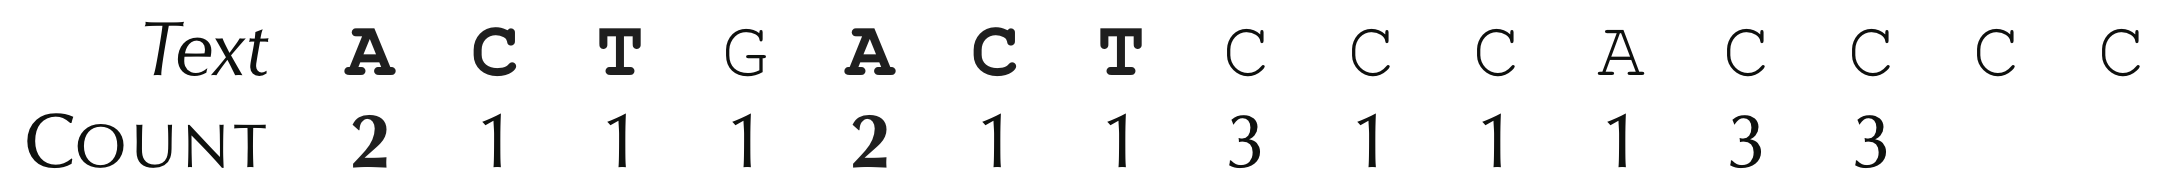

In [12]:
from IPython.display import Image
Image(filename='count_array.png')

Figure: The array Count for Text = ACTGACTCCCACCCC and k = 3. For example, Count(0) = Count(4) = 2 because ACT (shown in boldface) appears twice in Text.

The pseudocode for FrequentWords is shown below.

    FrequentWords(Text, k)
        FrequentPatterns ← an empty set
        for i ← 0 to |Text| − k
            Pattern ← the k-mer Text(i, k)
            Count(i) ← PatternCount(Text, Pattern)
        maxCount ← maximum value in array Count
        for i ← 0 to |Text| − k
            if Count(i) = maxCount
                add Text(i, k) to FrequentPatterns
        remove duplicates from FrequentPatterns
        return FrequentPatterns

# Hint 
In the above text string ACT appears two times and CCC appears 3 times

# Code Challenge: 
    Solve the Frequent Words Problem.
     Input: A string Text and an integer k.
     Output: All most frequent k-mers in Text.

In [15]:
# fill in your FrequentWords() function here along with any subroutines you need.
def FrequentWords(Text, k):
    # your code here
    
    words=[]
    freq = FrequencyMap(Text, k)
    m = max(freq.values())
    for key in freq:        
        if(freq[key] == m):
            words.append(key)  
       
    return words     
# Copy your FrequencyMap() function here.
def FrequencyMap(Text, k):
    # your code here.
    freq = {}
    n = len(Text)
    for i in range(n-k+1):
        Pattern = Text[i:i+k]
        if Pattern not in freq:
            freq[Pattern] = 1
        else:
            freq[Pattern] += 1

    return freq 

# Sample Input:

ACGTTGCATGTCGCATGATGCATGAGAGCT
4

# Sample Output:

CATG GCAT



# other way of implementing the above algorithm

In [14]:
def FrequentWords(Text, k):
    FrequentPatterns = list()
    Count = list()
    for i in range(len(Text)-k+1):
        Pattern = Text[i:i+k]
        Count.append(PatternCount(Text, Pattern))
    maxCount = max(Count)
    for i in range(len(Text)-k+1):
        if Count[i] == maxCount:
            FrequentPatterns.append(Text[i:i+k])
            FrequentPatterns = list(set(FrequentPatterns))
    return FrequentPatterns

def PatternCount(Text, Pattern):
# fill in your function here
    count = 0
    for i in range(len(Text)-len(Pattern)+1):
        if Text[i:i+len(Pattern)] == Pattern:
            count = count+1
    return count 





# STOP and Think: 

Take another look at the pseudocode for FrequentWords (especially if your algorithm for the Frequent Words Problem took time to run). How fast is this algorithm?

# Next Slide



Although FrequentWords finds most frequent k-mers, it is not very efficient. Each call to PatternCount(Text, Pattern) checks whether the k-mer Pattern appears in position 0 of Text, position 1 of Text, and so on. Since each k-mer requires |Text| − k + 1 such checks, each one requiring as many as k comparisons, the overall number of steps of PatternCount(Text, Pattern) is (|Text| − k + 1) · k. Furthermore, FrequentWords must call PatternCount |Text| − k + 1 times (once for each k-mer of Text), so that its overall number of steps is (|Text| − k + 1) · (|Text| − k + 1) · k. To simplify the matter, computer scientists often say that the runtime of FrequentWords has an upper bound of |Text|2 · k steps and refer to the complexity of this algorithm as O(|Text|2 · k). For more details, see "DETOUR: Big-O Notation" in the print companion.

If |Text| and k are small, as is the case when looking for DnaA boxes in the typical bacterial ori, then an algorithm with running time of O(|Text|2 · k) is perfectly acceptable. But once we find some new biological application requiring us to solve the Frequent Words Problem for a very long Text, we will quickly run into trouble. Check out Charging Station: The Frequency Array to learn about solving the Frequent Words Problem using a frequency array, a data structure that will also help us solve new coding challenges later in the chapter.


# Frequent Words in Vibrio cholerae

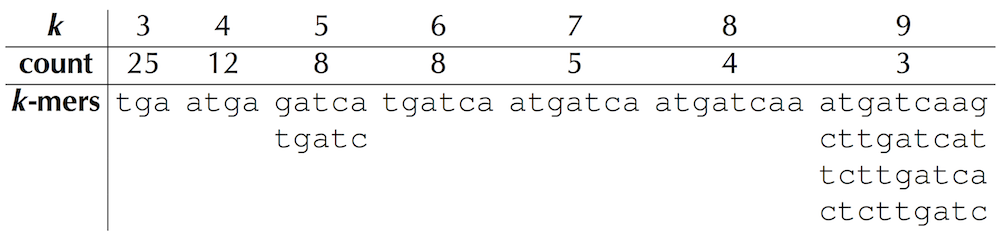

In [18]:
from IPython.display import Image
Image(filename='Vib_cholerae_most_frequent_words.png')

The table above reveals the most frequent k-mers in the ori region from Vibrio cholerae (reproduced below), along with the number of times that each k-mer occurs.

atcaatgatcaacgtaagcttctaagcatgatcaaggtgctcacacagtttatccacaac
ctgagtggatgacatcaagataggtcgttgtatctccttcctctcgtactctcatgacca
cggaaagatgatcaagagaggatgatttcttggccatatcgcaatgaatacttgtgactt
gtgcttccaattgacatcttcagcgccatattgcgctggccaaggtgacggagcgggatt
acgaaagcatgatcatggctgttgttctgtttatcttgttttgactgagacttgttagga
tagacggtttttcatcactgactagccaaagccttactctgcctgacatcgaccgtaaat
tgataatgaatttacatgcttccgcgacgatttacctcttgatcatcgatccgattgaag
atcttcaattgttaattctcttgcctcgactcatagccatgatgagctcttgatcatgtt
tccttaaccctctattttttacggaagaatgatcaagctgctgctcttgatcatcgtttc

# STOP and Think:

Do any of the counts in the above table seem surprisingly large?



For example, the 9-mer ATGATCAAG appears three times in the ori region of Vibrio cholerae—is it surprising?

atcaatgatcaacgtaagcttctaagcATGATCAAGgtgctcacacagtttatccacaac
ctgagtggatgacatcaagataggtcgttgtatctccttcctctcgtactctcatgacca
cggaaagATGATCAAGagaggatgatttcttggccatatcgcaatgaatacttgtgactt
gtgcttccaattgacatcttcagcgccatattgcgctggccaaggtgacggagcgggatt
acgaaagcatgatcatggctgttgttctgtttatcttgttttgactgagacttgttagga
tagacggtttttcatcactgactagccaaagccttactctgcctgacatcgaccgtaaat
tgataatgaatttacatgcttccgcgacgatttacctcttgatcatcgatccgattgaag
atcttcaattgttaattctcttgcctcgactcatagccatgatgagctcttgatcatgtt
tccttaaccctctattttttacggaagaATGATCAAGctgctgctcttgatcatcgtttc

We highlight a most frequent 9-mer instead of using some other value of k because experiments have revealed that bacterial DnaA boxes are usually nine nucleotides long. The probability that there exists a 9-mer appearing three or more times in a randomly generated DNA string of length 500 is approximately 1/1300. For more details, see "DETOUR: Probabilities of Patterns in a String" in the print companion.

# FAQ: 

How would we select the parameter k if we didn't know the length of the DnaA box in advance?




In fact, there are four different 9-mers repeated three or more times in this region: ATGATCAAG, CTTGATCAT, TCTTGATCA, and CTCTTGATC. The low likelihood of witnessing even one repeated 9-mer in the ori region of Vibrio cholerae leads us to the working hypothesis that one of these four 9-mers may represent a potential DnaA box that, when appearing multiple times in a short region, jump-starts replication. But which one?

# STOP and Think: 

Is any one of the four most frequent 9-mers in the ori of Vibrio cholerae "more surprising" than the others?

# FAQ: 

How does DnaA know which of several identical DnaA boxes to bind to?


# 1.3 Some Hidden Messages are More Surprising than Others

Recall that nucleotides A and T are complements of each other, as are G and C. Having one strand and a supply of “free floating” nucleotides, one can imagine the synthesis of a complementary strand on a template strand. This model of replication was confirmed rigorously by Meselson and Stahl in 1958. The beginning and end of a DNA strand are denoted 5’ (pronounced “five prime”) and 3’ (pronounced “three prime”), respectively. For more details, see "DETOUR: The Most Beautiful Experiment in Biology" in the print companion.

The figure below shows a template strand AGTCGCATAGT and its complementary strand ACTATGCGACT.

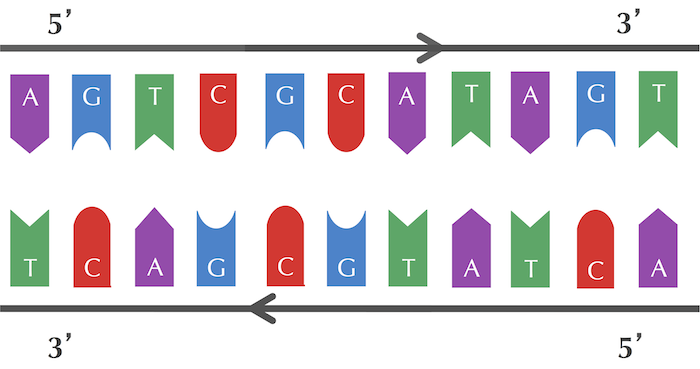

In [19]:
from IPython.display import Image
Image(filename='reverse_complement.png')

# Figure:
Complementary strands run in opposite directions. Each strand is read in the 5' → 3' direction.

At this point, you may think that we have made a mistake, since the complementary strand in this figure reads out TCAGCGTATCA from left to right rather than ACTATGCGACT. We have not: each DNA strand has a direction, and the complementary strand runs in the opposite direction to the template strand, as shown by the arrows in the figure. Each strand is read in the 5' → 3' direction. For more details, see "DETOUR: Directionality of DNA Strands" in the print companion.

Given a nucleotide p, we denote its complementary nucleotide as p*. The reverse complement of a string Pattern = p1 … pn is the string Patternrc = pn* … p1* formed by taking the complement of each nucleotide in Pattern, then reversing the resulting string. We will need the solution to the following problem throughout this chapter:

Reverse Complement Problem: Find the reverse complement of a DNA string.
     Input: A DNA string Pattern.
     Output: Patternrc , the reverse complement of Pattern.

Code Challenge: Solve the Reverse Complement Problem.

In [22]:
def ReverseComplement(Pattern):
    Pattern = Reverse(Pattern) # reverse all letters in a string
    Pattern = Complement(Pattern) # complement each letter in a string
    return Pattern


In [23]:
# fill in your ReverseComplement() function here along with any subroutines that you need.
def ReverseComplement(Pattern):
    # your code here
    reverse= Reverse(Pattern)
    reverseComplem = Complement(reverse)
    return reverseComplem    

# Copy your Reverse() function here.
def Reverse(Pattern):
    # your code here
    stringReverse = ""
    for i in Pattern:
        stringReverse = i + stringReverse    
    
    return stringReverse
      

# Copy your Complement() function here.
def Complement(Pattern):
    # your code here
    complement = ""
    complementPair= {"A":"T", "C":"G", "T":"A", "G":"C" }
    for i in Pattern:
        complement = complement + complementPair[i]
    return complement   





# Test input string 
AAAACCCGGT

# Test output string
ACCGGGTTTT


# STOP and Think:

Look again at the four most frequent 9-mers in the ori of Vibrio cholerae (shown below): ATGATCAAG, CTTGATCAT, TCTTGATCA, and CTCTTGATC.

atcaatgatcaacgtaagcttctaagcATGATCAAGgtgctcacacagtttatccacaac ctgagtggatgacatcaagataggtcgttgtatctccttcctctcgtactctcatgacca cggaaagATGATCAAGagaggatgatttcttggccatatcgcaatgaatacttgtgactt gtgcttccaattgacatcttcagcgccatattgcgctggccaaggtgacggagcgggatt acgaaagcatgatcatggctgttgttctgtttatcttgttttgactgagacttgttagga tagacggtttttcatcactgactagccaaagccttactctgcctgacatcgaccgtaaat tgataatgaatttacatgcttccgcgacgatttacCTCTTGATCATcgatccgattgaag atcttcaattgttaattctcttgcctcgactcatagccatgatgagCTCTTGATCATgtt tccttaaccctctattttttacggaagaATGATCAAGctgctgCTCTTGATCATcgtttc

Now do you notice anything surprising?




Interestingly, among the four most frequent 9-mers in ori of Vibrio cholerae, ATGATCAAG and CTTGATCAT are reverse complements of each other, resulting in the six total occurrences of these strings shown below.

atcaatgatcaacgtaagcttctaagcATGATCAAGgtgctcacacagtttatccacaac ctgagtggatgacatcaagataggtcgttgtatctccttcctctcgtactctcatgacca cggaaagATGATCAAGagaggatgatttcttggccatatcgcaatgaatacttgtgactt gtgcttccaattgacatcttcagcgccatattgcgctggccaaggtgacggagcgggatt acgaaagcatgatcatggctgttgttctgtttatcttgttttgactgagacttgttagga tagacggtttttcatcactgactagccaaagccttactctgcctgacatcgaccgtaaat tgataatgaatttacatgcttccgcgacgatttacctCTTGATCATcgatccgattgaag atcttcaattgttaattctcttgcctcgactcatagccatgatgagctCTTGATCATgtt tccttaaccctctattttttacggaagaATGATCAAGctgctgctCTTGATCATcgtttc

Finding a 9-mer that appears six times (either as itself or as its reverse complement) in a DNA string of length 500 is far more surprising than finding a 9-mer that appears three times (as itself). This observation leads us to the working hypothesis that ATGATCAAG and its reverse complement CTTGATCAT indeed represent DnaA boxes in Vibrio cholerae. This computational conclusion makes sense biologically because the DnaA protein that binds to DnaA boxes and initiates replication does not care which of the two strands it binds to. Thus, for our purposes, both ATGATCAAG and CTTGATCAT represent DnaA boxes.

However, before concluding that we have found the DnaA box of Vibrio cholerae, the careful bioinformatician should check if there are other short regions in the Vibrio cholerae genome exhibiting multiple occurrences of ATGATCAAG (or CTTGATCAT). After all, maybe these strings occur as repeats throughout the entire Vibrio cholerae genome, rather than just in the ori region. To this end, we need to solve the following problem.

Pattern Matching Problem: Find all occurrences of a pattern in a string.
     Input: Strings Pattern and Genome.
     Output: All starting positions in Genome where Pattern appears as a substring.


In [24]:
def PatternMatching(Pattern, Genome):
    positionCount = list() # output variable
    # your code here
    for i in range(len(Genome)-len(Pattern)+1):
        if Genome[i:i+len(Pattern)] == Pattern:
            positionCount.append(i)    
    return positionCount


# Test Input
Pattern:    ATAT
Genome:     GATATATGCATATACTT

# Test Output
1 3 9



Exercise Break: Return a space-separated list of starting positions (in increasing order) where CTTGATCAT appears as a substring in the Vibrio cholerae genome.

Notes:

    Exercise Breaks are chances for you to expand your knowledge of a topic. Like this question, they often give you a chance to apply an algorithm from a Code Challenge to real data. Exercise breaks are also optional, so you can feel free to continue reading.
    Different exercises will require different inputs. Please refer to the Sample Output below to see how your answer should be formatted.
    We will show all starting positions of ATGATCAAG in this genome on the next step.

FAQ: How can we have a standard genome sequence for a species if mutations are introduced at each replication?


def PatternMatching(Pattern, Genome):
    positionCount = list() # output variable
    # your code here
    for i in range(len(Genome)-len(Pattern)+1):
        if Genome[i:i+len(Pattern)] == Pattern:
            positionCount.append(i)    
    return positionCount

with open('Vibrio_cholerae.txt') as vc:
    genome = vc.read()
    
print(PatternMatching('ATGATCAAG', genome))

# Answer:

[60039, 98409, 129189, 152283, 152354, 152411, 163207, 197028, 200160, 357976, 376771, 392723, 532935, 600085, 622755, 1065555]



After solving the Pattern Matching Problem, we discover that ATGATCAAG appears 17 times in the following starting positions of the Vibrio cholerae genome:

116556, 149355, 151913, 152013, 152394, 186189, 194276, 200076, 224527,
307692, 479770, 610980, 653338, 679985, 768828, 878903, 985368

With the exception of the three occurrences of ATGATCAAG in ori at starting positions 151913, 152013, and 152394, no other instances of ATGATCAAG form clumps, i.e., appear close to each other in a small region of the genome. You may check that the same conclusion is reached when searching for CTTGATCAT. We now have strong statistical evidence that ATGATCAAG/CTTGATCAT may represent the hidden message to DnaA to start replication.

STOP and Think: Can we conclude that ATGATCAAG/CTTGATCAT also represents a DnaA box in other bacterial genomes?


# 1.4 An Explosion of Hidden Messages

# Looking for hidden messages in multiple genomes

We should not jump to the conclusion that ATGATCAAG/CTTGATCAT is a hidden message for all bacterial genomes without first checking whether it even appears in known ori regions from other bacteria. After all, maybe the clumping effect of ATGATCAAG/CTTGATCAT in the ori region of Vibrio cholerae is simply a statistical fluke that has nothing to do with replication. Or maybe different bacteria have different DnaA boxes…



Let's check the proposed ori region of Thermotoga petrophila, a bacterium that thrives in extremely hot environments; its name derives from its discovery in the water beneath oil reservoirs, where temperatures can exceed 80° Celsius.

aactctatacctcctttttgtcgaatttgtgtgatttatagagaaaatcttattaactga
aactaaaatggtaggtttggtggtaggttttgtgtacattttgtagtatctgatttttaa
ttacataccgtatattgtattaaattgacgaacaattgcatggaattgaatatatgcaaa
acaaacctaccaccaaactctgtattgaccattttaggacaacttcagggtggtaggttt
ctgaagctctcatcaatagactattttagtctttacaaacaatattaccgttcagattca
agattctacaacgctgttttaatgggcgttgcagaaaacttaccacctaaaatccagtat
ccaagccgatttcagagaaacctaccacttacctaccacttacctaccacccgggtggta
agttgcagacattattaaaaacctcatcagaagcttgttcaaaaatttcaatactcgaaa
cctaccacctgcgtcccctattatttactactactaataatagcagtataattgatctga

This region does not contain a single occurrence of ATGATCAAG or CTTGATCAT! Thus, different bacteria may use different DnaA boxes as "hidden messages" to the DnaA protein.

Application of the Frequent Words Problem to the ori region above reveals that the following six 9-mers appear in this region 3 or more times:

AACCTACCA   AAACCTACC   ACCTACCAC
CCTACCACC   GGTAGGTTT   TGGTAGGTT




Something peculiar must be happening because it is extremely unlikely that six different 9-mers will occur so frequently within the same short region in a random string. We will cheat a little and consult with Ori-Finder, a software tool for finding replication origins in DNA sequences. This software chooses CCTACCACC (along with its reverse complement GGTGGTAGG) as a working hypothesis for the DnaA box in Thermotoga petrophila. Together, these two complementary 9-mers appear five times in the replication origin:

aactctatacctcctttttgtcgaatttgtgtgatttatagagaaaatcttattaactga
aactaaaatggtaggtttGGTGGTAGGttttgtgtacattttgtagtatctgatttttaa
ttacataccgtatattgtattaaattgacgaacaattgcatggaattgaatatatgcaaa
acaaaCCTACCACCaaactctgtattgaccattttaggacaacttcagGGTGGTAGGttt
ctgaagctctcatcaatagactattttagtctttacaaacaatattaccgttcagattca
agattctacaacgctgttttaatgggcgttgcagaaaacttaccacctaaaatccagtat
ccaagccgatttcagagaaacctaccacttacctaccacttaCCTACCACCcgggtggta
agttgcagacattattaaaaacctcatcagaagcttgttcaaaaatttcaatactcgaaa
CCTACCACCtgcgtcccctattatttactactactaataatagcagtataattgatctga


# The Clump Finding Problem

Now imagine that you are trying to find ori in a newly sequenced bacterial genome. Searching for “clumps” of either ATGATCAAG /CTTGATCAT or CCTACCACC/GGTGGTAGG is unlikely to help, since this new genome may use a completely different hidden message! Before we lose all hope, let’s change our computational focus: instead of finding clumps of a specific k-mer, let’s try to find every k-mer that forms a clump in the genome. Hopefully, the locations of these clumps will shed light on the location of ori.

Our plan is to slide a window of fixed length L along the genome, looking for a region where a k-mer appears several times in short succession. The parameter value L = 500 reflects the typical length of ori in bacterial genomes.

We defined a k-mer as a "clump" if it appears many times within a short interval of the genome. More formally, given integers L and t, a k-mer Pattern forms an (L, t)-clump inside a (longer) string Genome if there is an interval of Genome of length L in which this k-mer appears at least t times. (This definition assumes that the k-mer completely fits within the interval.) For example, TGCA forms a (25,3)-clump in the following Genome:

gatcagcataagggtccCTGCAATGCATGACAAGCCTGCAGTtgttttac

From our previous examples of ori regions, ATGATCAAG forms a (500,3)-clump in the Vibrio cholerae genome, and CCTACCACC forms a (500,3)-clump in the Thermotoga petrophila genome. We are now ready to formulate the following problem.

Clump Finding Problem: Find patterns forming clumps in a string.
     Input: A string Genome, and integers k, L, and t.
     Output: All distinct k-mers forming (L, t)-clumps in Genome.

L      ---> Genome of Length

t      ---> Refers to number of times a k-mer appears

(L,t)  ---> All distinct k-mers forming (L, t)-clumps in Genome.




You can solve the Clump Finding Problem by applying your algorithm for the Frequent Words Problem to each window of length L in Genome. However, if your algorithm for the Frequent Words Problem is not very efficient, then such an approach may be impractical. For example, recall that FrequentWords has O(L2 · k) running time. Applying this algorithm to each window of length L in Genome will result in an algorithm with O(L2 · k · |Genome|) running time.

Moreover, even if we use a faster algorithm for the Frequent Words Problem (like the one described in Charging Station: The Frequency Array), the running time remains high when we try to analyze a bacterial — let alone human — genome. Check out Charging Station: Solving the Clump Finding Problem to learn about a more efficient approach for solving the Clump Finding Problem.


# Clump Finding

In [30]:
def ClumpFinding(genome, k, L, t):
    clumpList = list()
    for i in range(len(genome)-L+1):
        subGenome = genome[i:i+L]
        kmerDict = dict()
        for i in range(len(subGenome)-k+1):
            if subGenome[i:i+k] not in kmerDict.keys(): 
                kmerDict[subGenome[i:i+k]] = kmerDict.get(subGenome[i:i+k],0)
            kmerDict[subGenome[i:i+k]] +=  1
        for kmer in kmerDict.keys():
            if kmerDict[kmer] >= t and kmer not in clumpList: 
                clumpList.append(kmer)    
    return clumpList

# Test Input 

CGGACTCGACAGATGTGAAGAACGACAATGTGAAGACTCGACACGACAGAGTGAAGAGAAGAGGAAACATTGTAA
5 50 4

# Test Output

CGACA GAAGA



If you think your solution is efficient enough, try it out on the ﻿E. coli genome, the workhorse of bacterial genomics.

Exercise Break: How many different 9-mers form (500,3)-clumps in the E. coli genome? (In other words, do not count a 9-mer more than once.)


We find hundreds of different 9-mers forming (500,3)-clumps in the E. coli genome, and it is absolutely unclear which of these 9-mers might represent a DnaA box in the bacterium’s ori region.

At this point, an unseasoned researcher might give up, since it appears that we do not have enough information to locate ori in E. coli. But a fearless veteran bioinformatician would try to learn more about the details of replication in the hope that they provide new algorithmic insights into finding ori.

[1] True or False: The Hidden Message Problem is a well-defined computational problem.
False correct  

Answer: False

# Where in the Genome Does DNA Replication Begin?


### Video transcript below:



Since failure is not an option, we need to figure out what to do next, and we will try to do it by learning a little bit of biology.
And biology will give us a hint on how we should implement our algorithms.Some of you may find the description of somewhat convoluted biological concepts that I am about
to present difficult to digest. If you feel like this, don't worry; if you believe me that DNA replication is an asymmetric process, then you can simply skip this part and go to the point where we derive from this
biological knowledge how to design efficient algorithms.The first thing to remind ourselves is that DNA strands have directions, and the two strands
of DNA run in opposite directions.


Here on this slide, the blue strand runs clockwise, and the green strand runs counterclockwise. If you were a DNA polymerase, how would you replicate a genome?
If I was a DNA polymerase, I would do something very simple. I would wait until DNA unwinds a little bit, recruit 4 DNA polymerases, and I would just
move them along the genome, trying to replicate. It looks like just 4 DNA polymerases are enough to replicate the whole genome.


And when the replication fork enlarges, I continue and continue the replication process. This is simple but completely wrong. And if there are biology professors attending this lecture, they are probably already writing
a petition to fire me and send me to a "Biology 101" camp. The reason why it does not work is that DNA polymerases are unidirectional.
They can only copy DNA in the direction that is opposite to the direction of DNA, which means that when we want to recruit four DNA polymerases, two of them, this one and this
one, will be working just fine, but the two others won't be able to move because they cannot move in the same direction as the direction of DNA.
Then we can classify DNA strands into four half-strands.


The strand that I showed you (the blue strand that goes from origin to terminus) is the reverse half-strand, and I have no problem replicating it because moving from the origin
to terminus goes in the opposite direction to DNA. Likewise, this thick green line that I show right now also does not present any problem
replicating -- one DNA polymerase can accomplish it. But the two other half-strands present a big, big problem because we cannot move in the
same direction that they go. So, if you were a unidirectional DNA polymerase, how would you replicate a genome? Here is a potential solution.
Wait until the fork enlarges, and when it enlarges, start replicating it in the same direction to DNA,


When the fork enlarges a little bit more, you put another DNA polymerase and continue replicating. Four DNA polymerases wont be enough because each of these DNA polymerases that I recruited
copied just approximately 3000 nucleotides, so that we need a huge number of DNA polymerases to proceed this way. You can see that the resulting fragments, many fragments that are being built (called
Okazaki fragments) complicate our life a little bit. But, in the end, after this process is over, we will have many Okazaki fragments, so that
we will have the genome copied in many, many little fragments.


And the only thing we need afterwards is to repair the gaps between different Okazaki fragments and to replicate the genome. So the only thing we need to learn about this process to proceed with our algorithms afterwards
is that the reverse and forward half-strand (the thick half-strands and thin half-strands) have very different lifestyles. The reverse half-strand lives a double-stranded life because it is constantly replicated;
there is hardly a moment when it lives double stranded [sic -- should be "single stranded"]. But the forward half-strands spend a large portion of their lives single-stranded because
it has to wait until the replication fork opens and until it starts replication. I hope this is clear, but there is one looming question: "Why would a computer scientist
care?"


And we will learn in the next segment why a computer scientist should care about this. So, asymmetry of replication affects nucleotide frequencies. Why? Let's think about this.
Single-stranded DNA has a much higher mutation rate than double-stranded DNA. That's why, if one nucleotide has a greater mutation rate, then we should observe a shortage
of this nucleotide on the forward half-strand because it lives a single-stranded life. Which nucleotide, A, C, G, or T has a higher mutation rate? And why?


It turns out that there is a peculiar statistic of mutation rates of nucleotides, and cytosine (C) rapidly mutates into T. What is quite amazing is that through this deamination process, rate of mutations rise
100-fold when DNA is single-stranded, which means that the strand that lives the single-stranded life very quickly gets depleted from C.
What does it mean for us as algorithm designers?


Forward half-strands that live the single-stranded life have a shortage of C and normal G.
Reverse half-strands that live the double-stranded life have a shortage of G and normal C.


Now, keeping this in mind, let's take a walk long the genome. We start at the terminus and, let's say we move, according to the red line, from the
terminus to the origin. In this case, we move along the strand in which C is high and G is low, which means that #G -- #C is decreasing as we walk.
But when we walk along this half-strand, C is low and G is high, which means that #G -- #C, total number of nucleotides G minus the total number of nucleotides C, is decreasing
as we walk.


Again, this sounds like a peculiar and not very important thing, why do we care? I ask one more question: If you walk along a genome and you count the number of G minus the number of C that you
saw, and you have been seeing that #G -- #C has been decreasing, and suddenly starts increasing... Imagine, just imagine, you walk through the genome, you count the difference #G -- #C,
and it has been decreasing, and suddenly starts increasing.


My question is: "Where are in the genome are you?"

And to figure out where in the genome you are, we need once again to look at peculiar statistics. The only place in the genome where the behavior of #G -- #C switches from decreasing to increasing
is the origin of replication.


Which means that if you walk along the genome and see that #G -- #C has been decreasing and suddenly starts increasing, it means you just passed the origin of replication.
And this is the hint for our algorithm. 

In [ ]:
# Main Points from the above are:

# DNA process is an Asymmetric process

# DNA Strands have directions

# DNA polymerases Simple Definition

DNA polymerases are enzymes that synthesize DNA molecules from deoxyribonucleotides, the building blocks of DNA. These enzymes are essential for DNA replication and usually work in pairs to create two identical DNA strands from a single original DNA molecule. During this process, DNA polymerase "reads" the existing DNA strands to create two new strands that match the existing ones

# Where in the Genome Does DNA Replication Begin? 

###  Video Transcripts

    So, let's define a mathematical framework for how to deal with this. We define Skew(k) as simply #G -- #C in the first k nucleotides of the genome.
    And the skew diagram is simply a plot showing Skew(k) against k. Now, let's construct the skew diagram for the E. coli genome.
    It looks beautiful. Where do you think the origin of replication in E. coli is, something we almost had no hope to find.
    
    
    Of course, it is at the point where it [the skew] was decreasing and suddenly starts increasing, which is here. We found the replication origin in E. coli.
    And now, lets try to find frequent words in this origin, and hopefully, we will find DnaA box in this frame.
    
    After we run our Frequent Words Problem, unfortunately, it turns out there are no frequent words that appear even 3 times in this replication origin, which means that we failed.
    There are many reasons why we may fail: maybe the origin of replication, as derived from skew diagram, does not show precisely the area we want to see.
    Or maybe, just maybe, we don't have a good grip on what hidden messages in E. coli origin look like.
    
    
    Should we give up? Let's try to proceed further and figure out what else can be done. When we were looking for frequent words, our view of frequent words was very naïve.
    We assume that frequent words are simply k-mers. But maybe hidden messages that the cell uses to initiate replication are more elusive,
    more subtle.
    
    
    Let's look at this origin of replication in Vibrio cholerae and try to see, maybe there is something else. We already found six 9-mers in this region, but maybe, just maybe, there is something
    else that deserves our attention. [If] you look carefully there, then you will see that in addition to these six hidden messages,
    there are two more.
    
    
    There are actually two 9-mers that look almost like canonical 9-mers, they differ just in a single mutation. And they also represent DnaA boxes because DNA can bind not only to the perfect 9-mer
    but to different variations of this 9-mer. So, to find this type of more elusive frequent word, we need to solve Frequent Words with
    Mismatches Problem when the input is a string Text and integers k and d, and you want to find all most frequent word k-mers with at most d mismatches in Text.
    And finally, after we have done this, and run our Frequent Words with Mismatches Problem, we do find somewhat more elusive frequent words in E. coli genome, and they turn out
    to be real DnaA boxes in E. coli.
    
    
    Now, what I described is a very idealistic view of how the origin of replication can be found. In reality, some bacteria have fewer DnaA boxes, and our Frequent Words Problem will
    not work for finding them. The terminus of replication is often not located directly opposite the terminus of replication,
    and the skew diagram is often more complex than in the case of E. coli. 

# Week 2

# 2.1 The Simplest Way to Replicate DNA

We are now ready to discuss the replication process in more detail. As illustrated in the figure below, the two complementary DNA strands running in opposite directions around a circular chromosome unravel, starting at ori. As the strands unwind, they create two replication forks, which expand in both directions around the chromosome until the strands completely separate at the replication terminus (denoted ter). The replication terminus is located roughly opposite to ori in the chromosome.

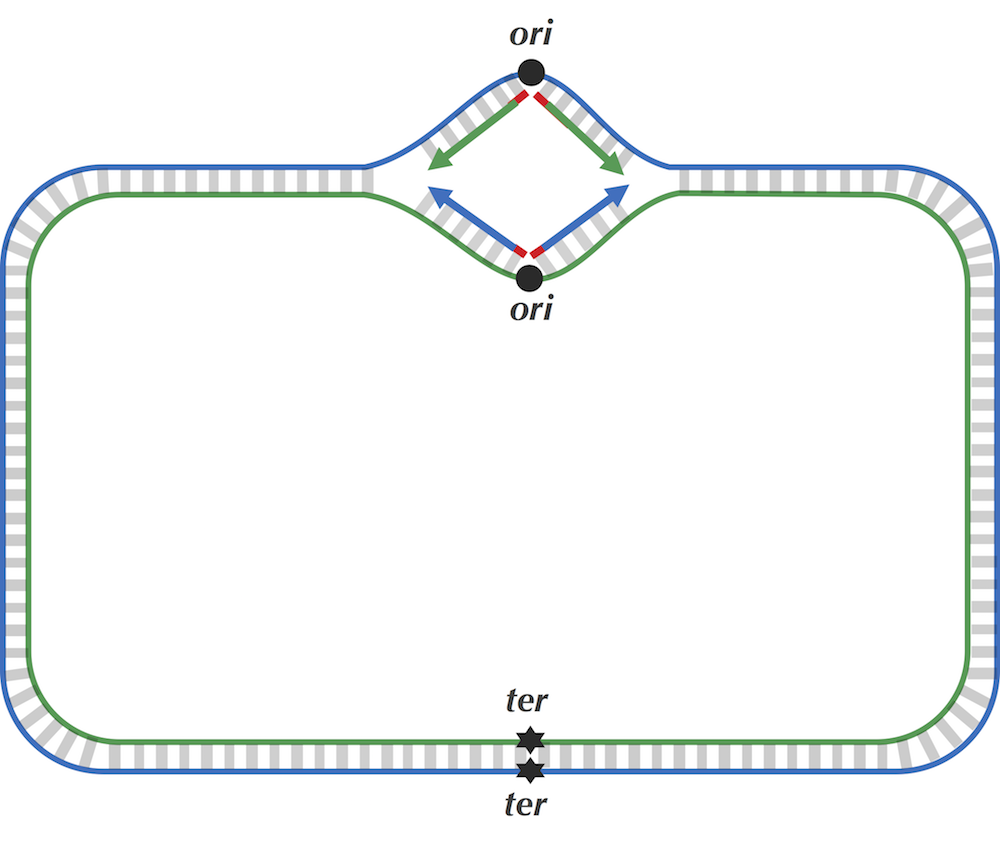

In [2]:
from IPython.display import Image
Image(filename='naive_replication.png')

   ## Figure: 
        
        Four imaginary DNA polymerases at work replicating a chromosome as the replication forks extend from ori to ter.
          The blue strand is directed clockwise; the green strand is directed counterclockwise.

An important thing to know about replication is that a DNA polymerase does not wait for the two parent strands to completely separate before initiating replication; instead, it starts copying while the strands are unraveling, as shown in the figure above. Thus, just four DNA polymerases, each responsible for one half-strand, can all start at ori and replicate the entire chromosome. To start replication, a DNA polymerase needs a primer, a short complementary segment (shown in red above) that binds to the parent strand and jump starts the DNA polymerase. After the strands start separating, each of the four DNA polymerases starts replication by adding nucleotides, beginning with the primer and proceeding around the chromosome from ori to ter in either the clockwise or counterclockwise direction.

When all four DNA polymerases have reached ter, the chromosome's DNA will have been completely replicated, resulting in two pairs of complementary strands shown in the lower figure, and the cell is ready to divide.

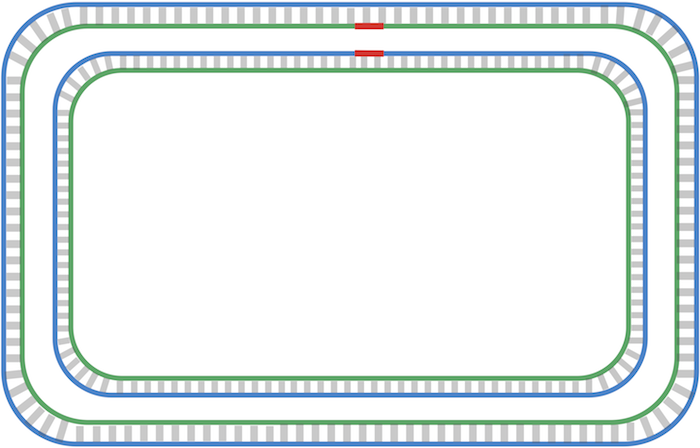

In [4]:
from IPython.display import Image
Image(filename='naive_replication_complete.png')

# Figure:
    
    Four imaginary DNA polymerases have replicated a chromosome.

Yet while you were reading this description, biology professors were writing a petition to have us fired and sent back to Biology 101. And they would be right, because our exposition suffers from a major flaw; we only described the replication process in this way so that you can better appreciate what we are about to reveal.

The problem with our current description is that it assumes that DNA polymerases can copy DNA in either direction along a strand of DNA (i.e., both 5’ → 3’ and 3’ → 5’). However, nature has not yet equipped DNA polymerases with this ability, as they are unidirectional, meaning that they can only traverse a template strand of DNA in the 3' → 5' direction, which is opposite from the 5’ → 3’ direction of DNA.

STOP and Think: If you were a unidirectional DNA polymerase, how would you replicate DNA? How many DNA polymerases would be needed to complete this task? Why?

FAQ: Why is DNA polymerase unidirectional?

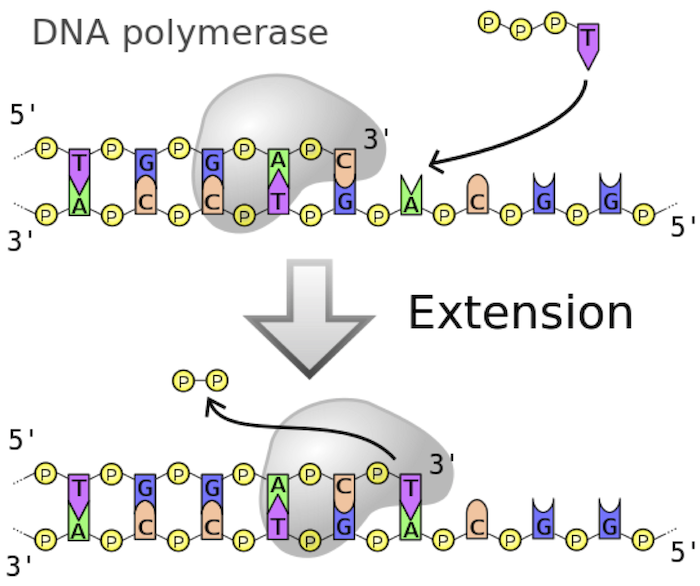

In [5]:
from IPython.display import Image
Image(filename='extension.png')

# Figure: 

DNA polymerase copies the template strand in the 3’ → 5’ direction. Note that it creates the daughter strand in
          the 5’ → 3’ direction. Courtesy Madeleine Price Ball.

The unidirectionality of DNA polymerase requires a major revision to our naive model of replication. Imagine that you decided to walk along DNA from ori to ter. There are four different half-strands of parent DNA connecting ori to ter, as highlighted in the figure below. Two of these half-strands are traversed from ori to ter in the 5’ → 3’ direction and are thus called forward half-strands (represented by thin blue and green lines in the figure below). The other two half-strands are traversed from ori to ter in the 3’ → 5’ direction and are thus called reverse half-strands (represented by thick blue and green lines in the figure below).

The unidirectionality of DNA polymerase requires a major revision to our naive model of replication. Imagine that you decided to walk along DNA from ori to ter. There are four different half-strands of parent DNA connecting ori to ter, as highlighted in the figure below. Two of these half-strands are traversed from ori to ter in the 5’ → 3’ direction and are thus called forward half-strands (represented by thin blue and green lines in the figure below). The other two half-strands are traversed from ori to ter in the 3’ → 5’ direction and are thus called reverse half-strands (represented by thick blue and green lines in the figure below).

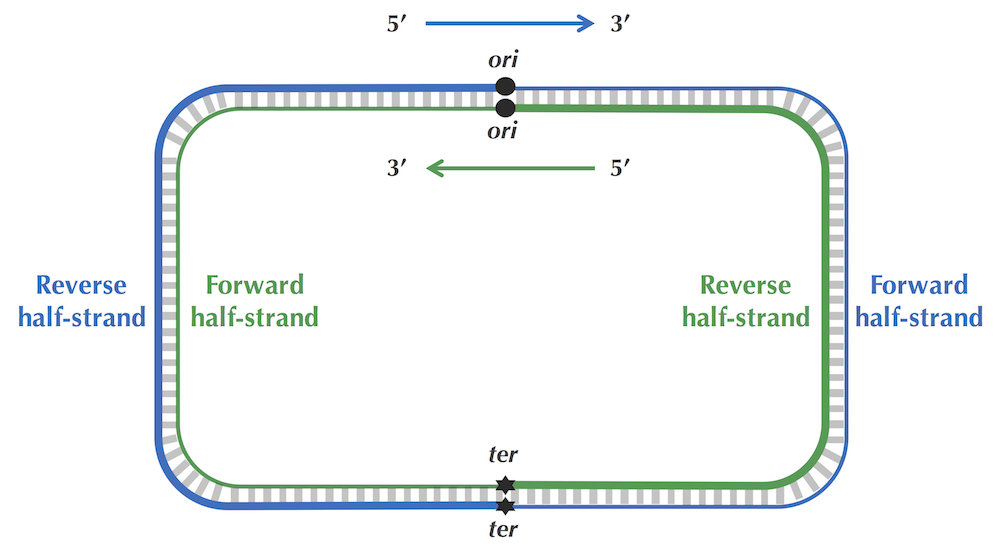

In [7]:
from IPython.display import Image
Image(filename='half_strands.png')

Figure: Complementary DNA strands with forward and reverse half-strands shown as thin and thick lines, respectively.

# 2.2 Asymmetry of Replication

While biologists will feel at home with the following description of DNA replication, computer scientists may find it overloaded with new terms. If it seems too biologically complex, then feel free to skim this lesson, as long as you believe us that the replication process is asymmetric, i.e., that forward and reverse half-strands have very different fates with respect to replication. Alternatively, you may watch an excellent video describing strand asymmetry at Education Portal.

Since a DNA polymerase can only move in the reverse (3′ → 5′) direction, it can copy nucleotides non-stop from ori to ter along reverse half-strands, as shown in the figure below. However, replication on forward half-strands is very different because a DNA polymerase cannot move in the forward (5' → 3') direction; on these half-strands, a DNA polymerase must replicate backwards toward ori. Take a look at the figure below to see why this must be the case.

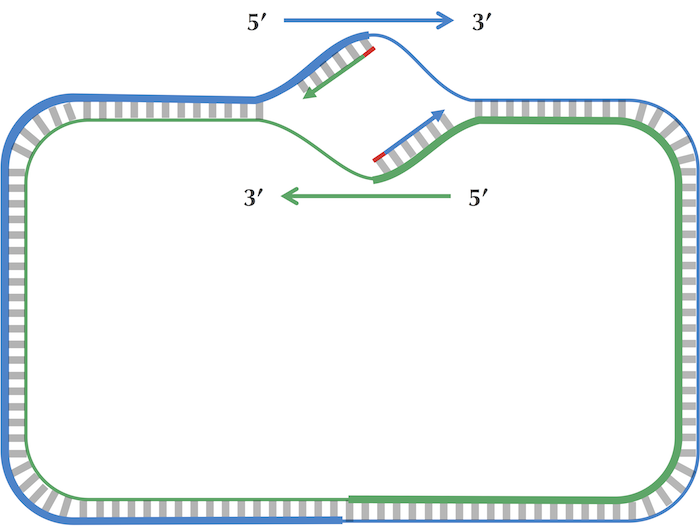

In [9]:
from IPython.display import Image
Image(filename='replication_fork.png')

# Figure: 
Replication begins at ori (primers shown in red) with the synthesis of fragments on the reverse half-strands (shown by thick lines). A DNA polymerase must wait until the replication fork has opened some (small) distance before
it starts copying the forward half-strands (shown by thin lines) back toward ori.

On a forward half-strand, in order to replicate DNA, a DNA polymerase must wait for the replication fork to open a little (approximately 2,000 nucleotides) until a new primer is formed at the end of the replication fork; afterwards, the DNA polymerase starts replicating a small chunk of DNA starting from this primer and moving backward in the direction of ori. When the two DNA polymerases on forward half-strands reach ori, we have the situation shown below.

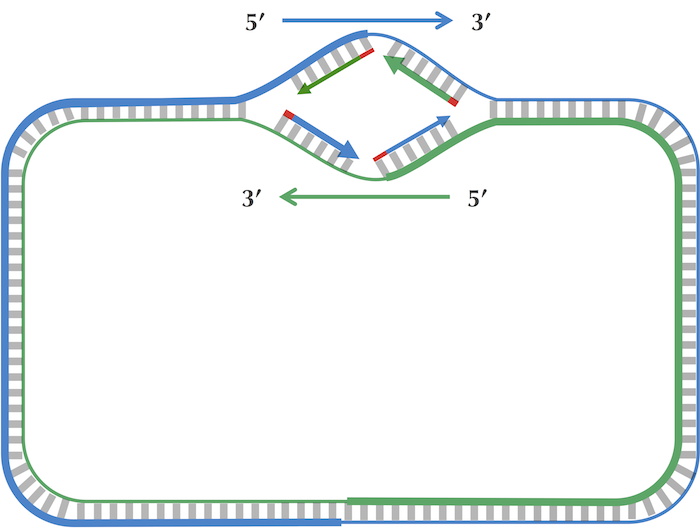

In [11]:
from IPython.display import Image
Image(filename='asymmetric_replication.png')

# Figure:

The daughter fragments are now synthesized (with some delay) on the forward half-strands (shown by thin lines).

After this point, replication on each reverse half-strand progresses continuously; however, a DNA polymerase on a forward half-strand has no choice but to wait again until the replication fork has opened another 2,000 nucleotides or so. It then requires a new primer to begin synthesizing another fragment back toward ori. On the whole, replication on a forward half-strand requires occasional stopping and restarting, which results in the synthesis of short Okazaki fragments from multiple primers that are complementary to intervals on the forward half-strands. You can see these fragments forming in the figure below.

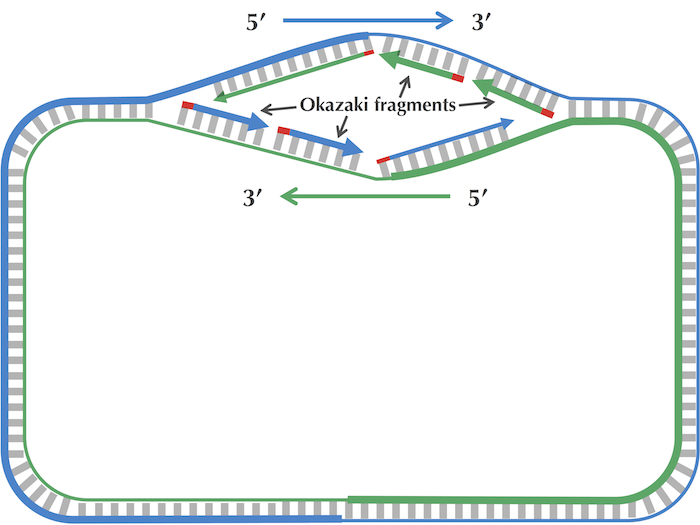

In [12]:
from IPython.display import Image
Image(filename='okazaki.png')

# Figure: 
    
The replication fork continues growing. Only one primer is needed for each of the reverse half-strands (shown by thick lines), while the forward half-strands (shown by thin lines) require multiple primers in order to synthesize Okazaki
fragments. Two of these primers are shown in red on each forward half-strand.

When the replication fork reaches ter, the replication process is almost complete, as all DNA has been synthesized. However, gaps still remain between the disconnected Okazaki fragments, as shown below.

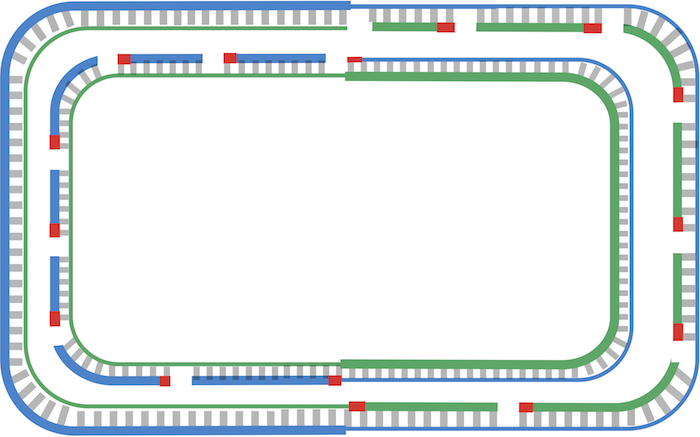

In [14]:
from IPython.display import Image
Image(filename='asymmetric_replication_almost_complete.png')

Finally, consecutive Okazaki fragments are sewn together by an enzyme called DNA ligase, resulting in two intact daughter chromosomes, each consisting of one parent strand and one newly synthesized daughter strand. In reality, DNA ligase does not wait until after all the Okazaki fragments have been replicated to start sewing them together.

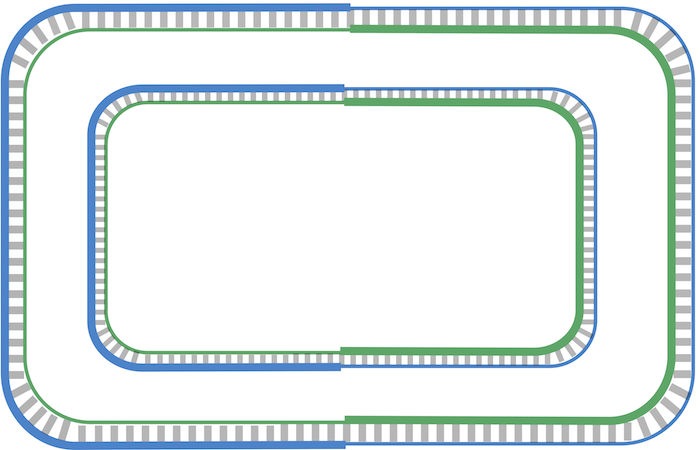

In [15]:
from IPython.display import Image
Image(filename='asymmetric_replication_complete.png')

Biologists call a reverse half-strand (thick lines) a leading half-strand since a single DNA polymerase traverses this half-strand non-stop, and they call a forward half-strand (thin lines) a lagging half-strand since it is used as a template by many DNA polymerases stopping and starting replication.

If you are confused about the differences between the leading and lagging half-strands, you are not alone — we and legions of biology students are also confused. The confusion is exacerbated by the fact that different textbooks use different terminology depending on whether the authors intend to refer to a leading template half-strand or a leading half-strand that is being synthesized from a (lagging) template half-strand. You hopefully see why we have chosen the terms "reverse" and "forward" half-strands in an attempt to mitigate some of this confusion.

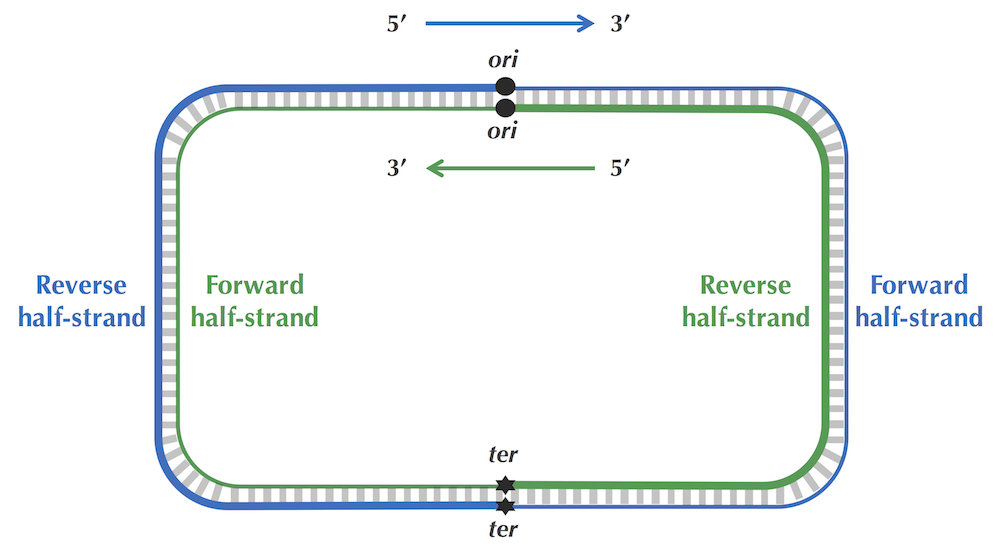

In [16]:
from IPython.display import Image
Image(filename='half_strands.png')

# Deamination

In the last section, we saw that as the replication fork expands, DNA polymerase synthesizes DNA quickly on the reverse half-strand but suffers delays on the forward half-strand. We will explore the asymmetry of DNA replication to design a new algorithm for finding ori.

How in the world can the asymmetry of replication possibly help us locate ori? Notice that since the replication of a reverse half-strand proceeds quickly, it lives double-stranded for most of its life. Conversely, a forward half-strand spends a much larger amount of its life single-stranded, waiting to be used as a template for replication. This discrepancy between the forward and reverse half-strands is important because single-stranded DNA has a much higher mutation rate than double-stranded DNA. In particular, if one of the four nucleotides in single-stranded DNA has a greater tendency than other nucleotides to mutate in single-stranded DNA, then we should observe a shortage of this nucleotide on the forward half-strand.

Following up on this thought, let’s compare the nucleotide counts of the reverse and forward half-strands. If these counts differ substantially, then we will design an algorithm that attempts to track down these differences in genomes for which ori is unknown. The nucleotide counts for the forward and reverse half-strands of the Thermotoga petrophila genome are shown in the table below.

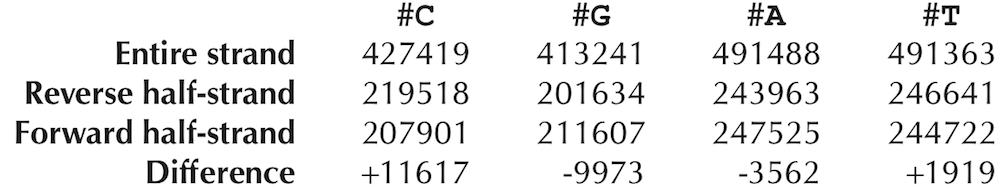

In [19]:
from IPython.display import Image
Image(filename='forward_reverse_nucleotide_counts.png')

STOP and Think: Do you notice anything about the nucleotide counts in this table?

# 2.3 Peculiar Statistics of the Forward and Reverse Half-Strands

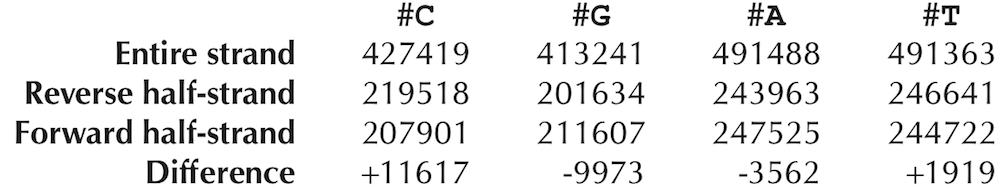

In [20]:
from IPython.display import Image
Image(filename='forward_reverse_nucleotide_counts_new.png')

 Although the frequencies of A and T are practically identical on the two half-strands, C is more frequent on the reverse half-strand than on the forward half-strand, resulting in a difference of 219518 - 207901 = +11617. Its complementary nucleotide G is less frequent on the reverse half-strand than on the forward half-strand, resulting in a difference of 201634 - 211607 = -9973.

It turns out that we observe these discrepancies because cytosine (C) has a tendency to mutate into thymine (T) through a process called deamination. Deamination rates rise 100-fold when DNA is single-stranded, which leads to a decrease in cytosine on the forward half-strand. Also, since C-G base pairs eventually change into T-A base pairs, deamination results in the observed decrease in guanine (G) on the reverse half-strand (recall that a forward parent half-strand synthesizes a reverse daughter half-strand, and vice-versa).

STOP and Think: If deamination changes cytosine to thymine, why do you think that the forward half-strand still has some cytosine?

FAQ: How does deamination lead to a mutation?

# The skew diagram

Let's see if we can take advantage of these peculiar statistics caused by deamination to locate ori. As the table on the previous step illustrates, the difference between the total amount of guanine and the total amount of cytosine is negative on the reverse half-strand (201634 - 219518 = -17884) and positive on the forward half-strand (211607 - 207901 = 3706). Thus, our idea is to traverse the genome, keeping a running total of the difference between the counts of G and C. If this difference starts increasing, then we guess that we are on the forward half-strand; on the other hand, if this difference starts decreasing, then the we guess that we are on the reverse half-strand. See the figure below.

FAQ: I understand why the amount of cytosine is decreasing on the forward half-strand, but why is the amount of guanine decreasing on the reverse half-strand?

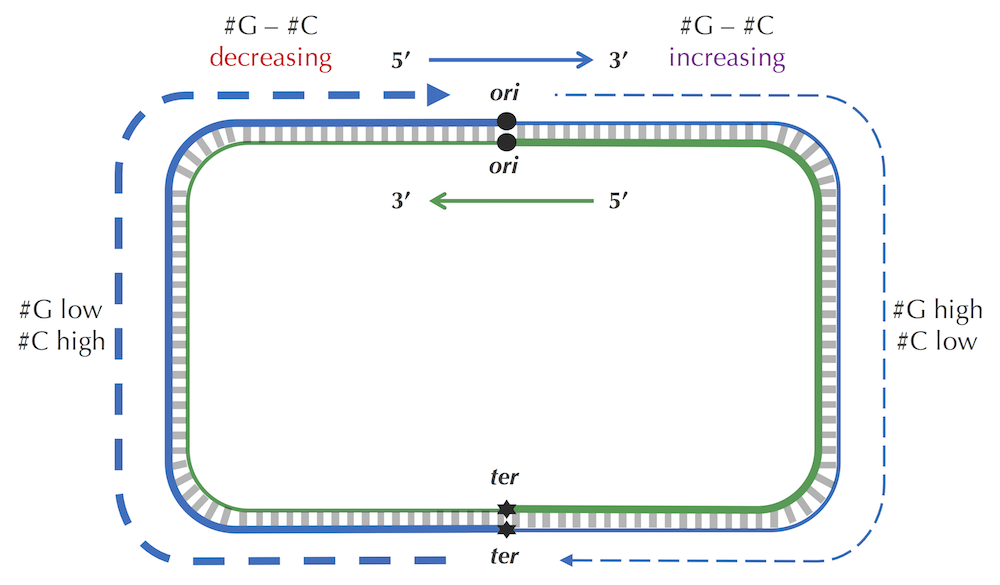

In [22]:
from IPython.display import Image
Image(filename='increasing_decreasing_skew.png')

STOP and Think: Imagine that you are reading through the genome (in the 5’ → 3' direction) and notice that the difference between the guanine and cytosine counts just switched its behavior from decreasing to increasing. Where in the genome are you?

Since we don't know the location of ori in a circular genome, let's linearize it (i.e., select an arbitrary position and pretend that the genome begins here), resulting in a linear string Genome. We define Skewi(Genome) as the difference between the total number of occurrences of G and the total number of occurrences of C in the first i nucleotides of Genome. The skew diagram is defined by plotting Skewi (Genome) (as i ranges from 0 to |Genome|), where Skew0 (Genome) is set equal to zero. The figure below shows a skew diagram for the DNA string CATGGGCATCGGCCATACGCC.

Note that we can compute Skewi+1(Genome) from Skewi(Genome) according to the nucleotide in position i of Genome. If this nucleotide is G, then Skewi+1(Genome) = Skewi(Genome) + 1; if this nucleotide is C, then Skewi+1(Genome)= Skewi(Genome) – 1; otherwise, Skewi+1(Genome) = Skewi(Genome).

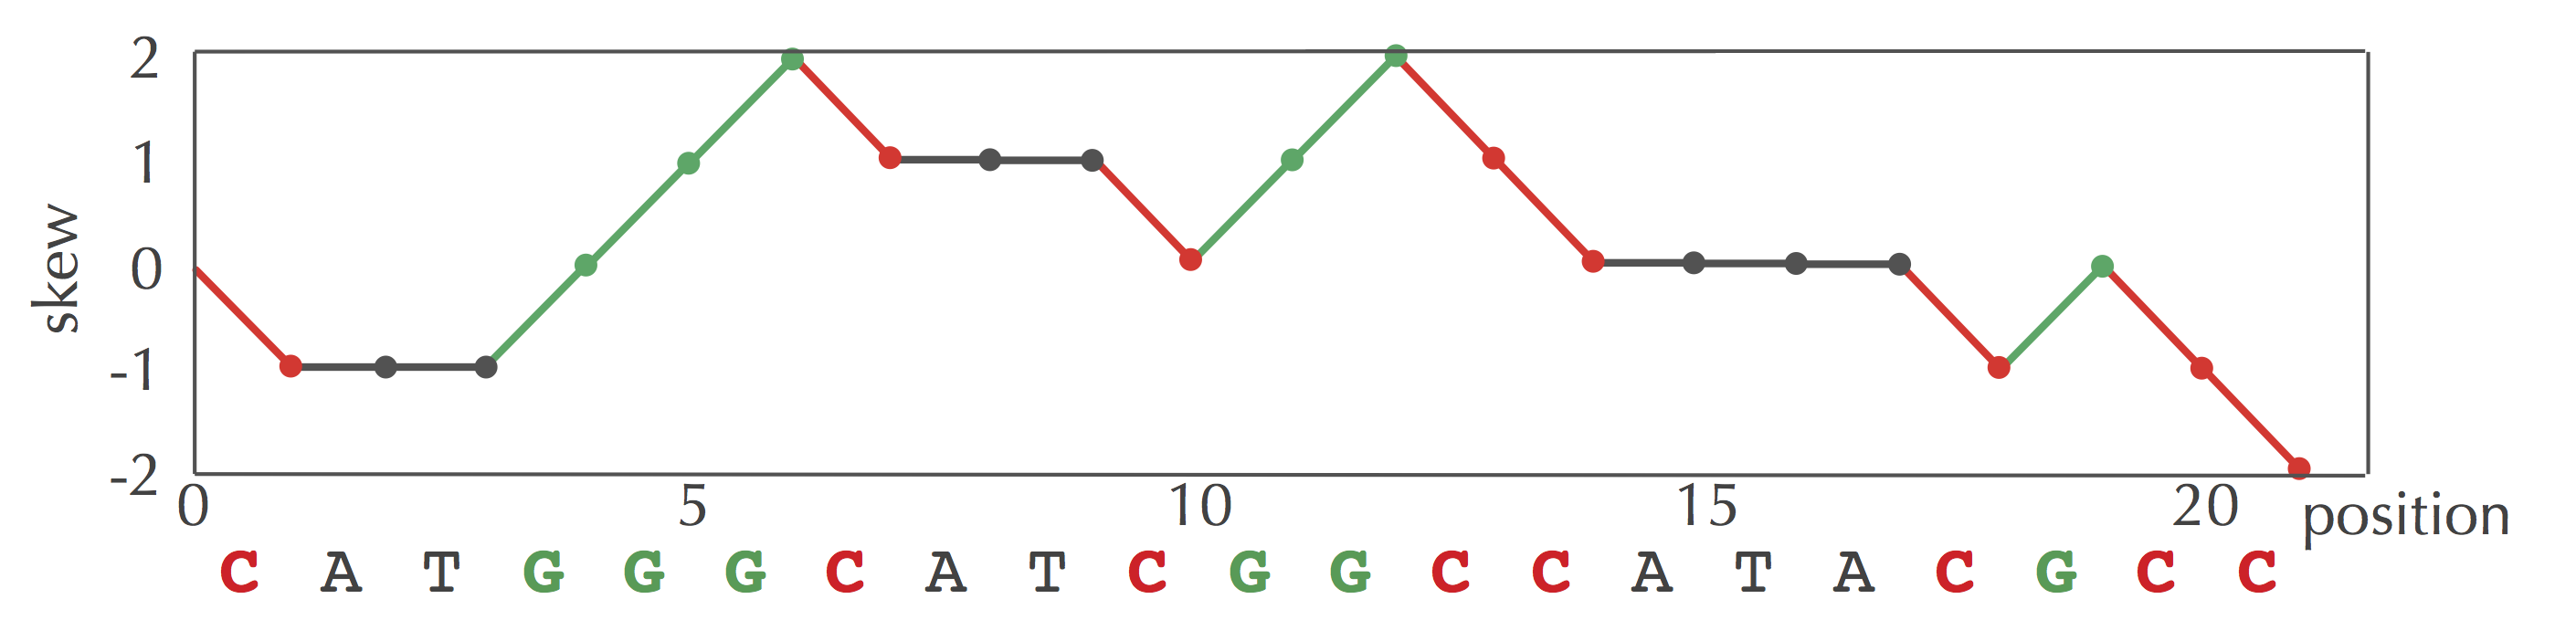

In [24]:
from IPython.display import Image
Image(filename='skew_diagram_basic.png')

# Exercise Break:
    
Give all values of Skewi (GAGCCACCGCGATA) for i ranging from 0 to 14.

# Sample Input:

CATGGGCATCGGCCATACGCC

# Sample Output:

0 -1 -1 -1 0 1 2 1 1 1 0 1 2 1 0 0 0 0 -1 0 -1 -2

In [25]:
def SkewArray(Genome):
    # your code here
    skew = [0]
    for i in range(0, len(Genome)):
        if Genome[i] == 'C':
            skew.append(skew[i] - 1)
        elif Genome[i] == 'G':
            skew.append(skew[i] + 1)
        else:
            skew.append(skew[i])
    return skew

print(SkewArray('GAGCCACCGCGATA'))

[0, 1, 1, 2, 1, 0, 0, -1, -2, -1, -2, -1, -1, -1, -1]


Now we show the skew diagram for a linearized E. coli genome. Notice the very clear pattern! It turns out that the skew diagram for many bacterial genomes has a similar characteristic shape.

FAQ: Why are the values of the skew diagram at the beginning and end of the genome not the same?

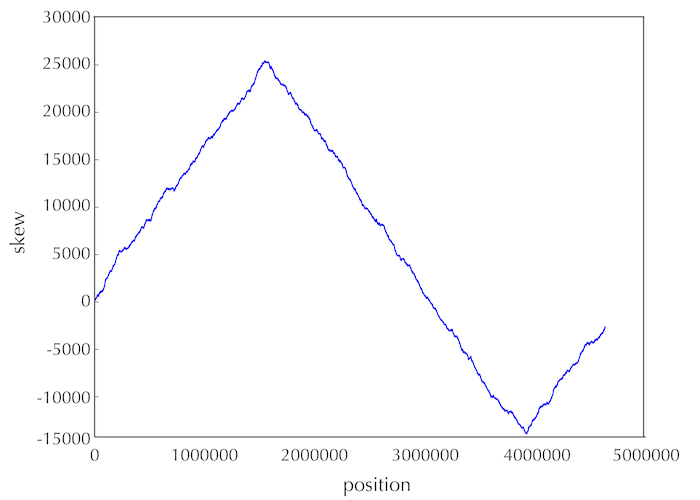

In [26]:
from IPython.display import Image
Image(filename='skew_diagram_ecoli.png')

STOP and Think: After looking at this skew diagram, where do you think that ori is located in E. coli?

Let's follow the 5' → 3' direction of DNA and walk along the chromosome from ter to ori (along a reverse half-strand), then continue on from ori to ter (along a forward half-strand). In our previous discussion, we saw that the skew is decreasing along the reverse half-strand and increasing along the forward half-strand. Thus, the skew should achieve a minimum at the position where the reverse half-strand ends and the forward half-strand begins, which is exactly the location of ori!

FAQ: Why do we analyze only one strand of DNA to compute the skew diagram?

We have just developed an insight for a new algorithm for locating ori: it should be found where the skew attains a minimum.

Minimum Skew Problem: Find a position in a genome where the skew diagram attains a minimum.
     Input: A DNA string Genome.
     Output: All integer(s) i minimizing Skewi (Genome) among all values of i (from 0 to |Genome|).

Code Challenge: Solve the Minimum Skew Problem.

In [29]:
def MinimumSkew(Genome):    
    skew = SkewArray(Genome)
    min_skew =0
    positions = list()
    for i in range(0, len(Genome)+1):        
        current_skew = skew[i]
        if current_skew == min_skew:           
            positions.append(i)
        elif current_skew < min_skew:
            positions = list()
            min_skew = current_skew            
            positions.append(i)      
    return positions

def SkewArray(Genome):
    skew = [0]
    for i in range(0, len(Genome)):
        if Genome[i] == 'C':
            skew.append(skew[i] - 1)
        elif Genome[i] == 'G':
            skew.append(skew[i] + 1)
        else:
            skew.append(skew[i])    
    return skew    

print(MinimumSkew('TAAAGACTGCCGAGAGGCCAACACGAGTGCTAGAACGAGGGGCGTAAACGCGGGTCCGAT'))




[11, 24]


STOP and Think: Note that the E. coli skew diagram below changes depending on where we start our walk along the circular chromosome. Do you think that the minimum of the skew diagram points to the same position in the genome regardless of where we begin walking to generate the skew diagram?

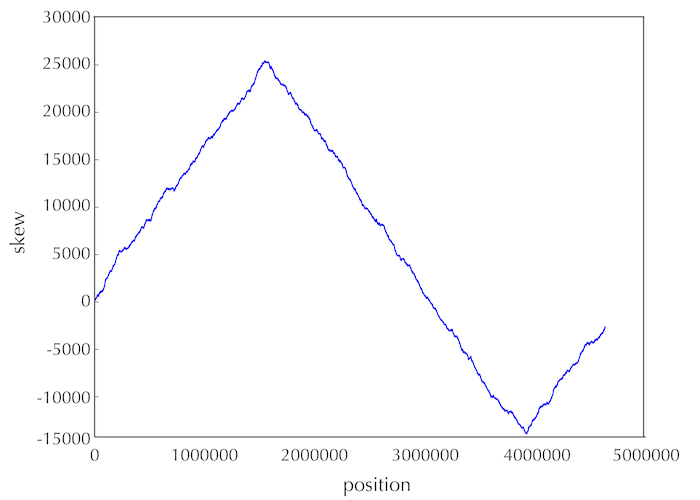

In [30]:
from IPython.display import Image
Image(filename='skew_diagram_ecoli.png')

# Other way to solve minimum skew

In [31]:
def MinimumSkew(Genome):
    skew = [0]
    for i in range(len(Genome)):
        skew.append(skew[i] + {'A':0,'C':-1,'G':1,'T':0}[Genome[i]])
    m = min(skew)
    return [i for i in range(len(skew)) if skew[i] == m]

print(MinimumSkew('TAAAGACTGCCGAGAGGCCAACACGAGTGCTAGAACGAGGGGCGTAAACGCGGGTCCGAT'))

[11, 24]




Solving the Minimum Skew Problem now provides us with an approximate location of ori at position 3923620 of E. coli. In an attempt to confirm this hypothesis, let's look for a hidden message representing a potential DnaA box near this location. Solving the Frequent Words Problem in a window of length 500 starting at position 3923620 (shown below) reveals no 9-mers (along with their reverse complements) that appear three or more times! Even if we have located ori in E. coli, it appears that we still have not found the DnaA boxes that jump-start replication in this bacterium …

aatgatgatgacgtcaaaaggatccggataaaacatggtgattgcctcgcataacgcggtatgaaaatggattgaagcccgggccgtggattctactcaactttgtcggcttgagaaagacc
tgggatcctgggtattaaaaagaagatctatttatttagagatctgttctattgtgatctcttattaggatcgcactgccctgtggataacaaggatccggcttttaagatcaacaacctgga
aaggatcattaactgtgaatgatcggtgatcctggaccgtataagctgggatcagaatgaggggttatacacaactcaaaaactgaacaacagttgttctttggataactaccggttgatccaa
gcttcctgacagagttatccacagtagatcgcacgatctgtatacttatttgagtaaattaacccacgatcccagccattcttctgccggatcttccggaatgtcgtgatcaagaatgttgatc
ttcagtg

STOP and Think: What would you do next?




Before we give up, let’s examine the ori of Vibrio cholerae one more time to see if it provides us with any insights on how to alter our algorithm to find DnaA boxes in E. coli. You may have noticed that in addition to the three occurrences of ATGATCAAG and three occurrences of its reverse complement CTTGATCAT, the Vibrio cholerae ori contains additional occurrences of ATGATCAAC and CATGATCAT, which differ from ATGATCAAG and CTTGATCAT in only a single nucleotide:

atcaATGATCAACgtaagcttctaagcATGATCAAGgtgctcacacagtttatccacaac
ctgagtggatgacatcaagataggtcgttgtatctccttcctctcgtactctcatgacca
cggaaagATGATCAAGagaggatgatttcttggccatatcgcaatgaatacttgtgactt
gtgcttccaattgacatcttcagcgccatattgcgctggccaaggtgacggagcgggatt
acgaaagCATGATCATggctgttgttctgtttatcttgttttgactgagacttgttagga
tagacggtttttcatcactgactagccaaagccttactctgcctgacatcgaccgtaaat
tgataatgaatttacatgcttccgcgacgatttacctCTTGATCATcgatccgattgaag
atcttcaattgttaattctcttgcctcgactcatagccatgatgagctCTTGATCATgtt
tccttaaccctctattttttacggaagaATGATCAAGctgctgctCTTGATCATcgtttc

Finding eight approximate occurrences of our target 9-mer and its reverse complement in a short region is even more statistically surprising than finding the six exact occurrences of ATGATCAAG and its reverse complement CTTGATCAT that we stumbled upon in the beginning of our investigation. Furthermore, the discovery of these approximate 9-mers makes sense biologically, since DnaA can bind not only to "perfect" DnaA boxes but to their slight variations as well.


We say that position i in k-mers p1 … pk and q1 … qk is a mismatch if pi ≠ qi. For example, CGAAT and CGGAC have two mismatches. The number of mismatches between strings p and q is called the Hamming distance between these strings and is denoted HammingDistance(p, q).

Hamming Distance Problem: Compute the Hamming distance between two strings.
     Input: Two strings of equal length.
     Output: The Hamming distance between these strings.

Code Challenge: Solve the Hamming Distance Problem.

# Main Point

# The number of mismatches between strings p (for example: CGAAT)  and q (for example: CGGAC) is called the Hamming distance between these strings and is denoted HammingDistance(p, q).

In [35]:
# Hamminh Distance Program

In [36]:
def HammingDistance(p, q):
    # your code here    
    return sum([1 for i in range(len(p)) if p[i] !=q[i]])

print(HammingDistance('GGGCCGTTGGT','GGACCGTTGAC'))

3


We say that a k-mer Pattern appears as a substring of Text with at most d mismatches if there is some k-mer substring Pattern' of Text having d or fewer mismatches with Pattern, i.e., HammingDistance(Pattern, Pattern') ≤ d. Our observation that a DnaA box may appear with slight variations leads to the following generalization of the Pattern Matching Problem.

Approximate Pattern Matching Problem: Find all approximate occurrences of a pattern in a string.
     Input: Strings Text and Pattern along with an integer d.
     Output: All starting positions where Pattern appears as a substring of Text with at most d mismatches.

# Code Challenge: Solve the Approximate Pattern Matching Problem.

In [40]:
# Input:  Strings Pattern and Text along with an integer d
# Output: A list containing all starting positions where Pattern appears
# as a substring of Text with at most d mismatches
def ApproximatePatternMatching(Text, Pattern, d):
    #positions = [] # initializing list of positions
    # your code here    
    return [i for i in range(len(Text)-len(Pattern)+1) if HammingDistance(Text[i:i+len(Pattern)], Pattern) <= d]


# Insert your Hamming distance function on the following line.
def HammingDistance(p, q):
    # your code here    
    return sum([1 for i in range(len(p)) if p[i] !=q[i]])

print(ApproximatePatternMatching('CGCCCGAATCCAGAACGCATTCCCATATTTCGGGACCACTGGCCTCCACGGTACGGACGTCAATCAAAT','ATTCTGGA',3))

[6, 7, 26, 27]



Our goal now is to modify our previous algorithm for the Frequent Words Problem in order to find DnaA boxes by identifying frequent k-mers, possibly with mismatches. Given strings Text and Pattern as well as an integer d, we define Countd(Text, Pattern) as the total number of occurrences of Pattern in Text with at most d mismatches. For example, Count1(AACAAGCTGATAAACATTTAAAGAG, AAAAA) = 4 because AAAAA appears four times in this string with at most one mismatch: AACAA, ATAAA, AAACA, and AAAGA. Note that two of these occurrences overlap.

Exercise Break: Compute Count2(AACAAGCTGATAAACATTTAAAGAG, AAAAA).


Answer is 11 (below is the code)

In [41]:
# Input:  Strings Pattern and Text along with an integer d
# Output: A list containing all starting positions where Pattern appears
# as a substring of Text with at most d mismatches
def ApproximatePatternMatching(Text, Pattern, d):
    #positions = [] # initializing list of positions
    # your code here    
    return [i for i in range(len(Text)-len(Pattern)+1) if HammingDistance(Text[i:i+len(Pattern)], Pattern) <= d]


# Insert your Hamming distance function on the following line.
def HammingDistance(p, q):
    # your code here    
    return sum([1 for i in range(len(p)) if p[i] !=q[i]])

print (len(ApproximatePatternMatching('AACAAGCTGATAAACATTTAAAGAG', 'AAAAA',2)))

11


Computing Countd(Text, Pattern) simply requires us to compute the Hamming distance between Pattern and every k-mer substring of Text, which is achieved by the following pseudocode.

    ApproximatePatternCount(Text, Pattern, d)
        count ← 0
        for i ← 0 to |Text| − |Pattern|
            Pattern′ ← Text(i , |Pattern|)
            if HammingDistance(Pattern, Pattern′) ≤ d
                count ← count + 1
        return count


STOP and Think: What is the running time of ApproximatePatternCount?

Code Challenge: Implement ApproximatePatternCount.
     Input: Strings Pattern and Text as well as an integer d.
     Output: Countd(Text, Pattern).

In [43]:
def ApproximatePatternCount(Text, Pattern, d):
    return len([i for i in range(len(Text)-len(Pattern)+1) if HammingDistance(Text[i:i+len(Pattern)], Pattern) <= d])

# Insert your HammingDistance function on the following line.
def HammingDistance(p, q):
    # your code here    
    return sum([1 for i in range(len(p)) if p[i] !=q[i]])
print(ApproximatePatternCount('TTTAGAGCCTTCAGAGG','GAGG',2))

4


A most frequent k-mer with up to d mismatches in Text is simply a string Pattern maximizing Countd(Text, Pattern) among all k-mers. Note that Pattern does not need to actually appear as a substring of Text; for example, as we already saw, AAAAA is the most frequent 5-mer with 1 mismatch in AACAAGCTGATAAACATTTAAAGAG, even though it does not appear exactly in this string.

This discussion leads us to the following problem.

Frequent Words with Mismatches Problem: Find the most frequent k-mers with mismatches in a string.
     Input: A string Text as well as integers k and d.
     Output: All most frequent k-mers with up to d mismatches in Text.

FAQ: Why do we not make the scoring function in the Frequent Words with Mismatches Problem more robust?

One way to solve the above problem is to generate all 4k k-mers Pattern, compute ApproximatePatternCount(Text, Pattern, d) for each k-mer Pattern, and then output k-mers with the maximum number of approximate occurrences.

Code Challenge: Solve the Frequent Words with Mismatches Problem.
     Input: A string Text as well as integers k and d. (You may assume that the length of Text is less than 100, k ≤ 4 and d ≤ 3.)
     Output: All most frequent k-mers with up to d mismatches in Text.

FAQ: In biological applications, how do we select the number of mismatches (d) when solving the Frequent Words with Mismatches Problem?

Debug Datasets

Beginner's Module

Note: Generating all k-mers is an inefficient approach in practice, since many of the 4k k-mers that this method analyzes should not be considered because neither they nor their mutated versions (with up to d mismatches) appear in Text. Check out Charging Station: Solving the Frequent Words with Mismatches Problem to learn about a better approach that avoids analyzing such hopeless k-mers.

In [46]:
def FrequentWordsWithMismatches(Text, k, d):
    varDict = dict()    
    for i in range(len(Text)-k+1):
        for neighbor in neighbors(Text[i:i+k],d):
            if neighbor in varDict.keys():
                varDict[neighbor] += 1
            else:
                varDict[neighbor] = 0
    m = max(varDict.values())    
    return [kmer for kmer in varDict if varDict[kmer] == m]

def neighbors(subText, d):  #subText in this case subText length is 4
    if d == 0:
        return [subText]
    if len(subText) == 1:
        return ['A','C','G','T']
    out = list()
    for neighbor in neighbors(subText[1:],d):        
        if hammingDistance(subText[1:],neighbor) < d:
            out.extend(['A'+neighbor,'C'+neighbor,'G'+neighbor,'T'+neighbor])
        else:
            out.append(subText[0] + neighbor)
    return out

def hammingDistance(subSubText, t):
    return sum([subSubText[i] != t[i] for i in range(len(subSubText))])

Text = 'ACGTTGCATGTCGCATGATGCATGAGAGCT'
k = 4
d = 1
print(FrequentWordsWithMismatches(Text,k,d))


['ATGT', 'GATG', 'ATGC']


In [47]:
def FrequentWordsWithMismatchesAndReverseComplements(Text, k, d):
    varDict = dict()    
    for i in range(len(Text)-k+1):
        for neighbor in neighbors(Text[i:i+k],d):
            if neighbor in varDict.keys():
                varDict[neighbor] += 1
            else:
                varDict[neighbor] = 0
    m = max(varDict.values())    
    list1 = [ReverseComplement(kmer) for kmer in varDict if varDict[kmer] == m]
    list2 = [kmer for kmer in varDict if varDict[kmer] == m]
    list3 = list1 + list2
    return list(set(list3))
     

def neighbors(subText, d):  #subText in this case subText length is 4
    if d == 0:
        return [subText]
    if len(subText) == 1:
        return ['A','C','G','T']
    out = list()
    for neighbor in neighbors(subText[1:],d):        
        if hammingDistance(subText[1:],neighbor) < d:
            out.extend(['A'+neighbor,'C'+neighbor,'G'+neighbor,'T'+neighbor])
        else:
            out.append(subText[0] + neighbor)
    return out

def hammingDistance(subText, t):
    return sum([subText[i] != t[i] for i in range(len(subText))])



def ReverseComplement(Pattern):
    # your code here
    reverse= Reverse(Pattern)
    reverseComplem = Complement(reverse)
    return reverseComplem    

# Copy your Reverse() function here.
def Reverse(Pattern):
    # your code here
    stringReverse = ""
    for i in Pattern:
        stringReverse = i + stringReverse    
    
    return stringReverse
      

# Copy your Complement() function here.
def Complement(Pattern):
    # your code here
    complement = ""
    complementPair= {"A":"T", "C":"G", "T":"A", "G":"C" }
    for i in Pattern:
        complement = complement + complementPair[i]
    return complement

print(FrequentWordsWithMismatchesAndReverseComplements('ACGTTGCATGTCGCATGATGCATGAGAGCT',4, 1))


['CATC', 'GATG', 'GCAT', 'ACAT', 'ATGC', 'ATGT']




We now make a final attempt to find DnaA boxes in E. coli by finding the most frequent 9-mers with mismatches and reverse complements in the region suggested by the minimum skew as ori. Although the minimum of the skew diagram for E. coli is found at position 3923620, we should not assume that its ori is found exactly at this position due to random fluctuations in the skew. To remedy this issue, we could choose a larger window size (e.g., L = 1000), but expanding the window introduces the risk that we may bring in other clumped 9-mers that do not represent DnaA boxes but appear in this window more often than the true DnaA box. It makes more sense to try a small window either starting, ending, or centered at the position of minimum skew.

Let’s cross our fingers and identify the most frequent 9-mers (with 1 mismatch and reverse complements) within a window of length 500 starting at position 3923620 of the E. coli genome. Bingo! The experimentally confirmed DnaA box in E. coli (TTATCCACA) is indeed a most frequent 9-mer with 1 mismatch, along with its reverse complement TGTGGATAA:

aatgatgatgacgtcaaaaggatccggataaaacatggtgattgcctcgc
ataacgcggtatgaaaatggattgaagcccgggccgtggattctactcaa
ctttgtcggcttgagaaagacctgggatcctgggtattaaaaagaagatc
tatttatttagagatctgttctattgtgatctcttattaggatcgcactg
cccTGTGGATAAcaaggatccggcttttaagatcaacaacctggaaagga
tcattaactgtgaatgatcggtgatcctggaccgtataagctgggatcag
aatgaggggTTATACACAactcaaaaactgaacaacagttgttcTTTGGA
TAActaccggttgatccaagcttcctgacagagTTATCCACAgtagatcg
cacgatctgtatacttatttgagtaaattaacccacgatcccagccattc
ttctgccggatcttccggaatgtcgtgatcaagaatgttgatcttcagtg

You will notice that we emphasized a large part of this sequence with bold text. This region is the experimentally verified ori of E. coli, which starts 37 nucleotides after position 3923620, where the skew reaches its minimum value.

FAQ: Why do we analyze the window starting (rather than ending or centered) at the position of E. coli where the skew achieves the minimum?

We were very fortunate that the DnaA boxes of E. coli are captured in the window that we chose. Moreover, while TTATCCACA represents a most frequent 9-mer with 1 mismatch and reverse complements in this 500-nucleotide window, it is not the only one: GGATCCTGG, GATCCCAGC, GTTATCCAC, AGCTGGGAT, and CTGGGATCA also appear 4 times with 1 mismatch and reverse complements.

STOP and Think: In this chapter, every time we find ori, we seem to find some other surprisingly frequent 9-mers. Why do you think this is?


We do not know what purpose — if any — these other 9-mers serve in the E. coli genome, but we do know that there are many different types of hidden messages in genomes; these hidden messages have a tendency to cluster within a genome, and most of them have nothing to do with replication. One example is the regulatory DNA motifs responsible for gene expression that we will study soon. The important lesson is that existing approaches to ori prediction remain imperfect and are sometimes inconclusive. However, even providing biologists with a small collection of 9-mers as candidate DnaA boxes is a great aid as long as one of these 9-mers is correct.

Thus, the moral of this chapter is that even though computational predictions can be powerful, bioinformaticians should collaborate with biologists to verify their computational predictions. Or improve these predictions: the next question hints at how ori predictions can be carried out using comparative genomics, a bioinformatics approach that uses evolutionary similarities to answer difficult questions about genomes.

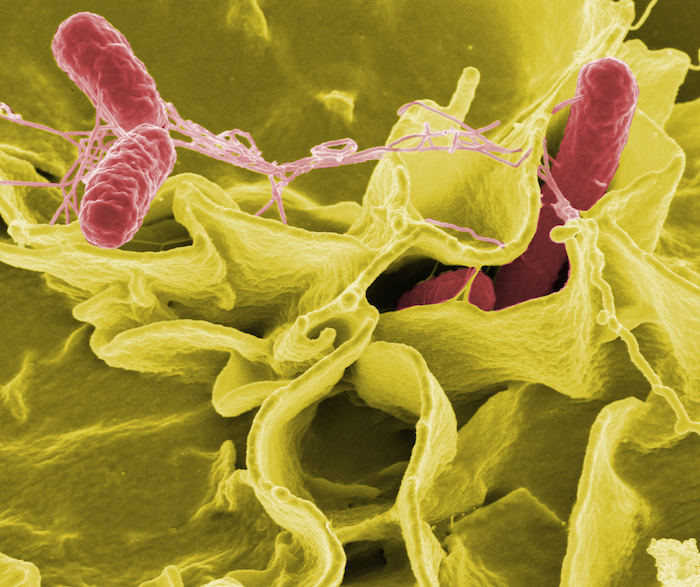

In [48]:
from IPython.display import Image
Image(filename='salmonella_1.png')

STOP and Think: Salmonella typhimurium is a close relative of E. coli that causes typhoid fever and foodborne illness. After having learned what DnaA boxes look like in E. coli, how would you look for DnaA boxes in Salmonella enterica?

Thanks for reading this far! We have covered a lot of material, but the chapter isn't finished yet. Each chapter in this book is accompanied by an epilogue considering additional practical considerations or complications of the central question.  The epilogue terminates with a "Final Challenge" asking you to apply what you have learned to a real dataset. The epilogue for this chapter is the next lesson.

Python Practice (Beginners Only): Review your existing work, and complete Units 6-8 at Codecademy so that you will be ready to take the next steps with the next week of content.

# 2.6 Epilogue: Complications in ori Predictions

In this chapter, we have considered three genomes and found three different hypothesized 9-mers encoding ATGATCAAG in Vibrio cholerae, CCTACCACC in Thermotoga petrophila, and TTATCCACA in E. coli. We must warn you that finding ori is often more complex than in the three examples we considered. Some bacteria have even fewer DnaA boxes than E. coli, making it difficult to identify them. The ter region is often located not directly opposite to ori but may be significantly shifted, resulting in reverse and forward half-strands having substantially different lengths. The position of the skew minimum is often only a rough indicator of ori position, which forces researchers to expand their windows when searching for DnaA boxes, bringing in extraneous repeated substrings. Finally, skew diagrams do not always look as nice as that of E. coli; for example, the skew diagram for Thermotoga petrophila is shown below.

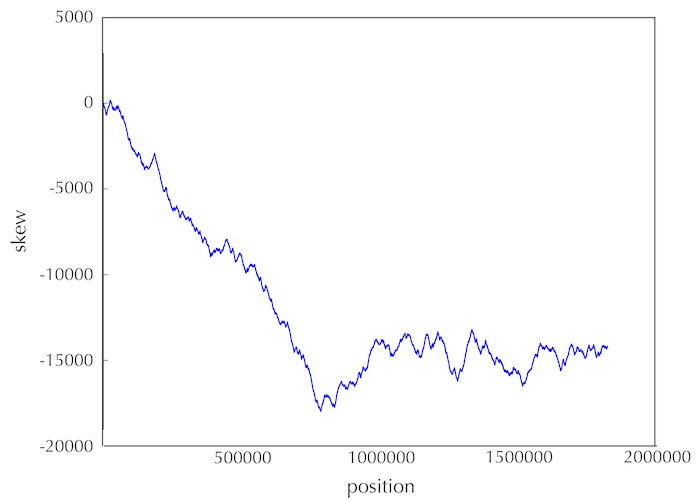

In [50]:
from IPython.display import Image
Image(filename='skew_diagram_tpetrophila.png')

STOP and Think: What evolutionary process could possibly explain the shape of the skew diagram for Thermotoga petrophila?



Since the skew diagram for Thermotoga petrophila is complex and the ori for this genome has not even been experimentally verified, there is a chance that the region predicted by Ori-Finder as the ori region for Thermotoga petrophila (or even for Vibrio cholerae) is actually incorrect!

You should now have a good sense of the practical considerations involved in locating ori and DnaA boxes computationally. If you're up to the task, we ask you to solve an optional, ungraded Final Challenge by working with the Salmonella enterica genome.

Final Challenge (Optional): Find a DnaA box in the genome of Salmonella enterica.


True or False: Deamination is more likely to occur when DNA is double-stranded than when it is single-stranded.
False correct  Answer: False

In [52]:
def HammingDistance(p, q):
    # your code here
    
    return sum([1 for i in range(len(p)) if p[i] !=q[i]])

print(HammingDistance('CAGAAAGGAAGGTCCCCATACACCGACGCACCAGTTTA','CACGCCGTATGCATAAACGAGCCGCACGAACCAGAGAG'))

23


Identify the value of i for which Skewi (CATTCCAGTACTTCATGATGGCGTGAAGA) attains a maximum value.  Answer = 28

#  Count1(TACGCATTACAAAGCACA, AA).

In [53]:
# Input:  Strings Pattern and Text along with an integer d
# Output: A list containing all starting positions where Pattern appears
# as a substring of Text with at most d mismatches
def ApproximatePatternCount(Text, Pattern, d):
    return len([i for i in range(len(Text)-len(Pattern)+1) if HammingDistance(Text[i:i+len(Pattern)], Pattern) <= d])


# Insert your HammingDistance function on the following line.
def HammingDistance(p, q):
    # your code here    
    return sum([1 for i in range(len(p)) if p[i] !=q[i]])

#print(ApproximatePatternCount('CGCCCGAATCCAGAACGCATTCCCATATTTCGGGACCACTGGCCTCCACGGTACGGACGTCAATCAAAT','ATTCTGGA',3))

#print (ApproximatePatternCount('AACAAGCTGATAAACATTTAAAGAG', 'AAAAA',2))

#print(ApproximatePatternCount('TTTAGAGCCTTCAGAGG','GAGG',2))

print(ApproximatePatternCount('TACGCATTACAAAGCACA','AA',1))

13


The d-neighborhood of the k-mer Pattern is the collection of all k-mers that are at most Hamming distance d from Pattern. How many 4-mers are in the 3-neighborhood of Pattern = ACGT?

In [54]:
def FrequentWordsWithMismatches(Text, k, d):
    varDict = dict()    
    for i in range(len(Text)-k+1):
        for neighbor in neighbors(Text[i:i+k],d):
            if neighbor in varDict.keys():
                varDict[neighbor] += 1
            else:
                varDict[neighbor] = 0
    m = max(varDict.values())    
    list1 = [kmer for kmer in varDict if varDict[kmer] == m]
    return list1
     

def neighbors(subText, d):  #subText in this case subText length is 4
    if d == 0:
        return [subText]
    if len(subText) == 1:
        return ['A','C','G','T']
    out = list()
    for neighbor in neighbors(subText[1:],d):        
        if hammingDistance(subText[1:],neighbor) < d:
            out.extend(['A'+neighbor,'C'+neighbor,'G'+neighbor,'T'+neighbor])
        else:
            out.append(subText[0] + neighbor)
    return out

def hammingDistance(subText, t):
    return sum([subText[i] != t[i] for i in range(len(subText))])


print (len(FrequentWordsWithMismatches('ACGT',4, 3)))

175


# Video Transcripts

# Regulatory Motifs

Today we will talk about algorithms for finding regulatory motifs in DNA.
And we will start from game when we will be implanting patterns in random strings.
Let's generate ten random sequences.
And then let's take a 15-nucleotide-long pattern, and insert it at
random positions in these ten sequences. Now, turn your head,
I will hide these patterns, and tell me where these patterns are.
What algorithm should you run to figure out where I have inserted this pattern?
And you already probably recognized that if we slightly modified our
frequent words problem, we will find the pattern I have inserted.
Indeed, you can concatenate all the sequences and
find the most frequent word in the resulting concatenate.
The implanted pattern will appear ten times in this concatenate.
It is surprisingly frequent, which will most most likely mean
that it was the pattern that I have inserted.
Now let me change the experiment slightly. Now instead of the
patterns that
I implant without any changes,
I will insert the same 15 nucleotide long patter with
four random mutations at random positions.
And, in this is case, this pattern forms a so-called (k,d) motif
which is a k-mer that appears in every sequence
at most d mutations.
Can you find such a pattern if I hide from you where I inserted it?
Do you think that the Frequent Words Problem will be able to help us?
Well, that all may be entertaining
but what biologists think about this game?
I think biologists are falling asleep, because it's absolutely
unclear what this problem has to do with real biological problems.
And I will try to show you that this problem is
actually about a biological problem of finding regulatory elements in DNA.
My next question will be, do we have a clock gene?
Think about our daily schedule
and think how our life depends on day and night.
In every cell, we probably have to express different
proteins depending on what time of the day is it.
But who are these molecular time keepers who tell the
cells in our body what is the time right now?
How do these molecular time keepers change gene expression to
produce proteins needed at night as opposed to proteins needed in the morning?
And anoother questions that is relevant to this, can we find genes responsible
for sleep disorders When our Circadian Clock has problems.
Now, we will focus on plants rather than human because
for plants, keeping time is a matter of life and death.
Just think about photosynthesis, flowering, or frost resistance.
If you don't know what is the time, you will be dead if you are a plant.
And, the question that arises is how probably a thousand plus
genes in plants follow the circadian clock.
Who controls them?
Who are the molecular managers who tells these
genes to increase or decrease gene expression?
Here comes the surprise.
Just three genes in plants are molecular managers that are
responsible for orchestrating this circadian behavior.
And they're called CCA1, LCY, and TOC1. These genes are regulatory proteins,
also know as transcription factors. And these genes,
to control other genes,
(to exert control over circadian clock) they bind to short regions
(maybe 10 nucleotide, 15 nucleotides) in the upstream regions of the genes.
For example, if one of these regulatory
proteins wants to control a particular circadian gene,
it probably has a region within thousand nucleotides
from the start of the gene where it binds.
For example, here's CCA1, one of the three regulators.
and to exert control over these genes, it has to bind in the upstream reason
of these genes. But how does CCA1 know where to bind?
Probably there are some hidden messages that tell CCA1: "Bind here!"
Our goal today is to find this particular hidden
message (that's shown on the slide) where CCA1 binds to.
Of course, we don't know where these hidden messages are actually hiding.
In the upstream regions, and today we will learn about algorithms
that are aimed at finding such hidden messages.
We will start from formulating the problem.
So, when we talked about implanting a 15-mer with four
random mutations, we figured out that the Frequent Words Algorithm wouldn't be
able to find it, because there are no frequent words
that appearing without mutations in the resulting strings after implantations.
That's why we need to solve a different problem that I call the
Implanted Motif Problem. In this problem, you are given a set of
stings Dna, and integers k and d. And you need to find all (k,d) motifs in Dna.
How should we solve this problem?
Should we possibly explore all possible 4 to the power k k-mers and
see which of them represent (k,d)-motifs. That will take time.
That's why, let's try something else.
Let's try to see whether a pairwise comparison
(comparing sequences to each other) would help.
Think about this.
Each sequence is random.
The only non-randomness in these sequences is
are these implanted motifs, and that's why they probably exhibit
larger similarity than other regions of random sequences.
Thus, my idea, let's find the most.
closed 15-mers,
[INAUDIBLE],
let's say in the first and second sequence,
and it will give us an idea on how the implanted pattern looks like.
Would it work?
Let's figure out whether the pairwise comparison between
strings will help us to find the implanted motifs.
Well, unfortunately, it won't work because when we implant a pattern, it has
four differences from the original pattern, but we don't have
access to the pattern, so there is nothing to compare with.
The only thing that we have are implanted instances.
But every two implanted instances actually
may be four plus four mutations apart.
How we can find them? Since pairwise comparison won't work,
maybe the only option we have is just to
explore all four to the power k possible k-mers.
.
Should we explore all of them?
Not necessarily, because if a k-mer is so far away from all k-mers
in the strings that we analyze, there is no reason to explore it.
It cannot possibly be an implanted pattern.
That's why motif enumeration algorithm would
look like this.
We will start from each k-mer, from a sequence.
Let's call it a.
For each such k-mer, let generate all possible mutations with up to
d nucleotides mutated, and for each such mutated k-mer
a', let's check whether it appears as a (k,d)-mer in the string.
That will work,
(it will be slow but definitely will work if k is small)
but the question we should ask, would it solve the real biological problem?
Unfortunately it won't, it won't work because our
model for implanting patterns is not very biological.
It doesn't properly reflect biological reality.
I would say a little bit
messy biological reality, because when biologist generate,
let's say, a set of genes, that are
controlled by circadian clock, they cannot guarantee that
all these genes have a particular pattern implanted.
Some genes don't have any patterns implanted in their upstream region.
As a result, we need to find out a way to search for motifs, even if
some sequence don't have any motifs implanted.
And that makes our life, little bit more difficult and we need to develop scoring
for every set of motifs, even in the case when some of the implanted pattern
don't look very similar to the canonical motif.
And we'll move to the next topic, which is motif finding problem
that is more
adequate for finding regulatory motifs.

In the last section,
we saw that the motif enumeration algorithm that we proposed had a flaw:
It assumed that the motif that we are looking for
must occur in every string in the collection of strings under consideration,
which is not necessarily true in biological applications.
As an alternative, our plan is to assign a score to a given collection of k-mers
chosen from the strings.
So, say that we have collected such a set of k-mers,
which we call Motifs, represented here as a matrix.
We indicate the most frequent nucleotide in each column of this matrix
by a capital letter, breaking ties arbitrarily.
So note that positions two and three in the motif matrix are the most conserved.
Nucleotide G occurs in these positions in every k-mer,
whereas position ten, at the end of the motif matrix, is the least conserved.
A common method of visualizing a motif matrix is with a motif logo, in which
the size of the nucleotide correlates with how often it occurs in the motif matrix.
Taking the capital letter in each column, construct a consensus string for
this particular choice of k-mers that will also provide us with a candidate motif.
Our goal then is to choose k-mers from the underlying strings, so
that they produce the most conserved motif matrix.
Then, simply take the consensus string as our desired biological motif.
We therefore are going to define the score of the motif matrix
as simply the number of lowercase letters in the matrix.
Counting the number of lowercase letters column by column,
we see that the score for this choice of motifs is equal to 30.
We can now restate our goal as choosing a collection of k-mers
from the underlying strings in order to minimize this score.
So we now have a more appropriate computational problem,
which we call the Motif Finding Problem.
A brute force algorithm for the Motif Finding Problem would simply
consider every possible choice of k-mers to form a motif matrix and
then simply take a collection of k-mers having the lowest score.
But, as with any brute force approach,
we need to ask ourselves how fast this algorithm is.
Assuming that there are, say, t strings under consideration, all of length n,
then there are (n-k+1)^t such possibilities for
how to form a motif matrix.
Then, scoring the matrix requires k*t steps.
So, assuming that k is much smaller than n, as is the case in practice,
the overall running time of this approach is approximately O(n^t * k*t).
Now, the n^t term means that this algorithm is useless for
practical values of n and t, and so we're going to need a faster algorithm.
So, to improve on our existing brute force approach,
we will rethink the motif finding problem.
Specifically, I've noted here that, when we choose the motif matrix,
it automatically gives us a consensus string.
Our new approach will be to choose the consensus string first,
then look for a motif matrix that scores best against this consensus.
How do we achieve this?
Well, until now, we have been scoring the motif matrix column-by-column.
However, we could just as easily compute the number of lower case symbols on
the motif matrix row-by-row.
I want you to note that the number of lower case symbols in a row
is equal to the number of symbols in that row that don't match the consensus,
which we know as the Hamming Distance between that row and the consensus string.
As a result, the score of the motifs matrix is just the sum
Hamming Distances between each string in the matrix and the consensus string,
which we're going to write as d(Consensus(Motifs), Motifs).
This discussion now leads us to the equivalent Motif Finding Problem,
in which we are looking for a pattern that will serve as our consensus string,
i.e., a pattern that minimizes the distance to motifs
over all choices of motifs in the underlying strings.
It may still seem that we have not made our work any easier though,
since we are now looking for a pattern in addition to a collection of motifs,
whereas before we just looked for a collection of motifs.
However, we will see in the next section that we don't need to search through every
possible choice of motifs in order to find an optimal consensus string,
which is what we're looking for.
End of transcript. Skip to the start.

I am now introducing the median string problem, and
to define this problem, we need to define the notion
of distance not only between k-mers of the same size,
but also the distance between a k-mer and the longer string.
So what is this distance between two strings of different lengths.
We simply start from a smaller string (a k-mer) and compare it to the first k-mer
in the text.
Distance in this case is seven, we move further. distance
six, continue, continue, continue until the end of the string.
And then, return to the place where the distance was minimal.
So in this way, we will find a k-mer within a longer string that is most close
to our k-mer of interest, and this is the distance between a pattern and a string.
What is the distance between a k-mer and a set of strings.
In this case, it's simply the sum of distances
between a pattern and each string in the set.
For example, for a pattern AAA and a set of strings shown on the slide,
we can compute distance with every string and simply sum up all the distances.
The result
is five. And median string for the set of strings
Dna is a k-mer pattern minimizing distance between pattern
and DNA over all possible k-mers.
And our median string problem will be based on the
problem we formulated before, which is yet another equivalent motif finding problem.
If you remember this problem, then it looks like
even more complicated than the original motif finding problem,
because in this problem, we need to find
a k-mer and a set of motifs satisfying certain properties.
But in fact, the only thing we need to find
is a k-mer pattern as shown in this median string problem.
In this case, we search for a k-mer
pattern minimizing distance between this pattern and the
set of strings Dna (among all possible k-mers).
Now, there is a very simple algorithm for solving this problem.
We simply need to try all possible k-mers and see whether the
distance between the pattern and DNA is minimal
among all possible k-mer.
The running time of this algorithm is 4 to the power k times n*t*k, where
we analyze
t sequences of length n. So what we have just accomplished?
We started from motif finding problem, and the brute
force algorithm for solving this problem was incredibly slow.
We've turned it into yet another equivalent motif finding problem,
and through this problem, we were able to switch to the median string problem
with this very different run time.
In fact, it's still an exponential algorithm
but for practical applications (where k is usually less than 15)
we still can run this algorithm. So dramatic improvement on the Motif Finding
Problem that we started from. So sometimes, change of perspective helps.
And to move further,
we will notice that although the Median String
Problem is much faster than the Motif Finding Problem,
it's still slow if we search for
long motifs
and little bit later we will figure out how to deal with such motifs.
Our last topic in this segment is Greedy Motif Search.
We'll now talk about a greedy algorithm, for solving the Motif Finding Problem.
Given a set of motifs,
we have already learned how to construct the consensus string.
Now let's construct the count matrix
where in every column we simply have counts for all nucleotides.
And also. this count matrix can be transformed into the so-called
profile matrix where we have frequencies of nucleotides in every column.
Now, these frequencies of nucleotides in every column
can be viewed as a four-sided, biased dice,
representing probabilities of ending up on a given face of a dice.
And we can view it as a probability distribution.
And if it is a die, let's ask a question: "What is the probability that tossing
such a die based on the motifs will generate a given string of DNA?"
For example,
what will be the probability for generating a string shown at this light?
So given the following profile, we ask, what is
the probability of generating the consensus string, AAACCT?
And this probability will be simply computed by
multiplication of corresponding elements in the profile matrix.
If you take
another string, we will get a different probability.
And you have already noticed that the closer the string is to the consensus
string of the profile, the higher is the probability of generating this string.
And now, we define the notion of Profile-most probable k-mer in a sequence.
This is a k-mer with the
highest probability among all k-mers in the string.
And here's an example of how I can
generate Profile-most probable k-mer in a string.
We start from the first k-mer in the string, compute probability,
and record it in the last column of the matrix.
We continue until we fill all the matrix, and
finally, select the largest probability, which in this case, corresponds to the
red entry in the matrix. And with this at hand,
we are now ready for GreedyMotifSearch, which works in a very
simple way. We start from the set of i-1 motifs
selected from the first i-1 sequences
and show how to extend this set
of motifs by the motif in the i-th sequence.
What we do, we form profile of motif from the first i-1 1 sequences
and then select profile most probable k-mer in the sequence number i.
Afterwards, we iterate.
And that will the result in the greedy algorithm for
solving the problem.
And we will see later whether it works or doesn't work for our goals.
End of transcript. 

# 4.1 Do We Have a "Clock" Gene?

Note: If you've already made it this far, then please sit tight for now.  We're finalizing the code challenges in a couple of spots, so please come back and visit in a few days.



The daily schedules of animals, plants, and even bacteria are controlled by an internal timekeeper called the circadian clock. Anyone who has experienced the misery of jet lag knows that this clock never stops ticking. Rats and research volunteers alike, when placed in a bunker, naturally maintain a roughly 24-hour cycle of activity and rest in total darkness. And, like any timepiece, the circadian clock can malfunction, resulting in a genetic disease known as delayed sleep-phase syndrome (DSPS).



The circadian clock must have some basis on the molecular level, which presents many questions. How do individual cells in animals and plants, let alone bacteria, know when they should slow down or increase the production of certain proteins? Is there a “clock gene”? Can we explain why heart attacks occur more often in the morning, while asthma attacks are more common at night? And can we identify genes that are responsible for “breaking” the circadian clock to cause DSPS?



In the early 1970s, Ron Konopka and Seymour Benzer identified mutant flies with abnormal circadian patterns and traced the flies’ mutations to a single gene. Biologists needed two more decades to discover a similar clock gene in mammals, which was just the first piece of the puzzle. Today, many more circadian genes have been discovered; these genes, having names like timeless, clock, and cycle, orchestrate the behavior of hundreds of other genes and display a high degree of evolutionary conservation across species.



We will first focus on plants, since maintaining the circadian clock in plants is a matter of life and death. Consider how many plant genes should pay attention to the time when the sun rises and sets; indeed, biologists estimate that over a thousand plant genes are circadian, including the genes related to photosynthesis, photo reception, and flowering. These genes must somehow know what time it is in order to change their gene transcript production, or gene expression, throughout the day. For more details, see "DETOUR: Gene Expression" in the print companion.